**Name - Aditya Jain**

**Batch No. - DS2310**

**Assingment - Baseball Case Study**

In [1]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # filter warnings
warnings.filterwarnings('ignore')


In [2]:
# import data..................
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [3]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 30
No. of columns 17


**Observation-:**
    
- The datasets contains 16 features which contains statistics summary of the baseball player and the 'W'(wins) is the largest variable which predict the number of wins. 

- Input features in this datasets are: Runs, At bats, Hits, Doubles, Triples, Homeruns, Walks, StrikeOut, Stolenbase, Runs Allowed, Earned Runs, Earned Runs Average(ERA), Shutouts, Saves, Complete Games and Errors

- Target Features: Number of predicted wins(W)

In [4]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

**The columns names present in our data that is not making much sense and will need deciphering to be converted into understandable format. In order to gain understanding of diffrent columns in dataset, following baseball stastics termilogy i got from wikipedia.**

**Pitching Statistics-:**
- W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.

- RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.

- ER - This means Earned run.Number of runs that did not occur as a result of errors or passed balls.

- ERA - This means Earned Run Average.Total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.

- CG - This means Complete Game.Number of games where player was the only pitcher for their team.

- SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.

- SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.

**Batting Statistics**

- R - This indicates Runs scored.Number of times a player crosses home plate.

- AB - This means At bat or time at bat. 

- H - This means Hit. It's also called a "base hit".

- 2B- A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit".

- 3B- A triple is sometimes called a "three-bagger" or "three-base hit".

- HR - This means Home runs.

- BB - This means Base on balls (also called a "walk")

- SO - Also denoted as "K" means Strikeout

**Base Running Statistics-:**

- SB - This means Stolen base.Number of bases advanced by the runner while the ball is in the possession of the defense.

- R - This indicates Runs scored.Number of times a player crosses home plate.

**Fielding Statistics -:**

- E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

**Now that we have clear understanding on what the abbreviation mean and In order to simplify we are going to rename columns in datasets.**

In [5]:
data.rename(columns={'W':'Wins',
                    'R':'Runs Scored',
                    'AB':'At Bat',
                    'H':'Hits',
                    '2B': 'Doubles',
                    '3B':'Triples',
                    'HR':'Home Run',
                    'BB': 'Base on Ball',
                    'SO':'Strike Out',
                    'SB':'Stolen Base',
                    'RA':'Run Average',
                    'ER':'Earned Runs',
                    'ERA':'Earned Runs Average',
                    'CG':'Complete Game',
                    'SHO':'Shut Outs',
                    'SV':'Saves',
                    'E':'Errors'},
           inplace = True)

In [6]:
data.head()

Wins  Runs Scored  At Bat  Hits  Doubles  Triples  Home Run  Base on Ball  \
0    95          724    5575  1497      300       42       139           383   
1    83          696    5467  1349      277       44       156           439   
2    81          669    5439  1395      303       29       141           533   
3    76          622    5533  1381      260       27       136           404   
4    74          689    5605  1515      289       49       151           455   

   Strike Out  Stolen Base  Run Average  Earned Runs  Earned Runs Average  \
0         973          104          641          601                 3.73   
1        1264           70          700          653                 4.07   
2        1157           86          640          584                 3.67   
3        1231           68          701          643                 3.98   
4        1259           83          803          746                 4.64   

   Complete Game  Shut Outs  Saves  Errors  
0              2          8     56      88  
1              2         12     45      86  
2             11         10     38      79  
3              7          9     37     101  
4              7         12     35      86

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Wins                 30 non-null     int64  
 1   Runs Scored          30 non-null     int64  
 2   At Bat               30 non-null     int64  
 3   Hits                 30 non-null     int64  
 4   Doubles              30 non-null     int64  
 5   Triples              30 non-null     int64  
 6   Home Run             30 non-null     int64  
 7   Base on Ball         30 non-null     int64  
 8   Strike Out           30 non-null     int64  
 9   Stolen Base          30 non-null     int64  
 10  Run Average          30 non-null     int64  
 11  Earned Runs          30 non-null     int64  
 12  Earned Runs Average  30 non-null     float64
 13  Complete Game        30 non-null     int64  
 14  Shut Outs            30 non-null     int64  
 15  Saves                30 non-null     int64

**Observation-:**

- we can see that dataset contains only numeric data and no column has categorial column
- This data falls into regression analysis.

# Statistical Analysis

<Axes: >

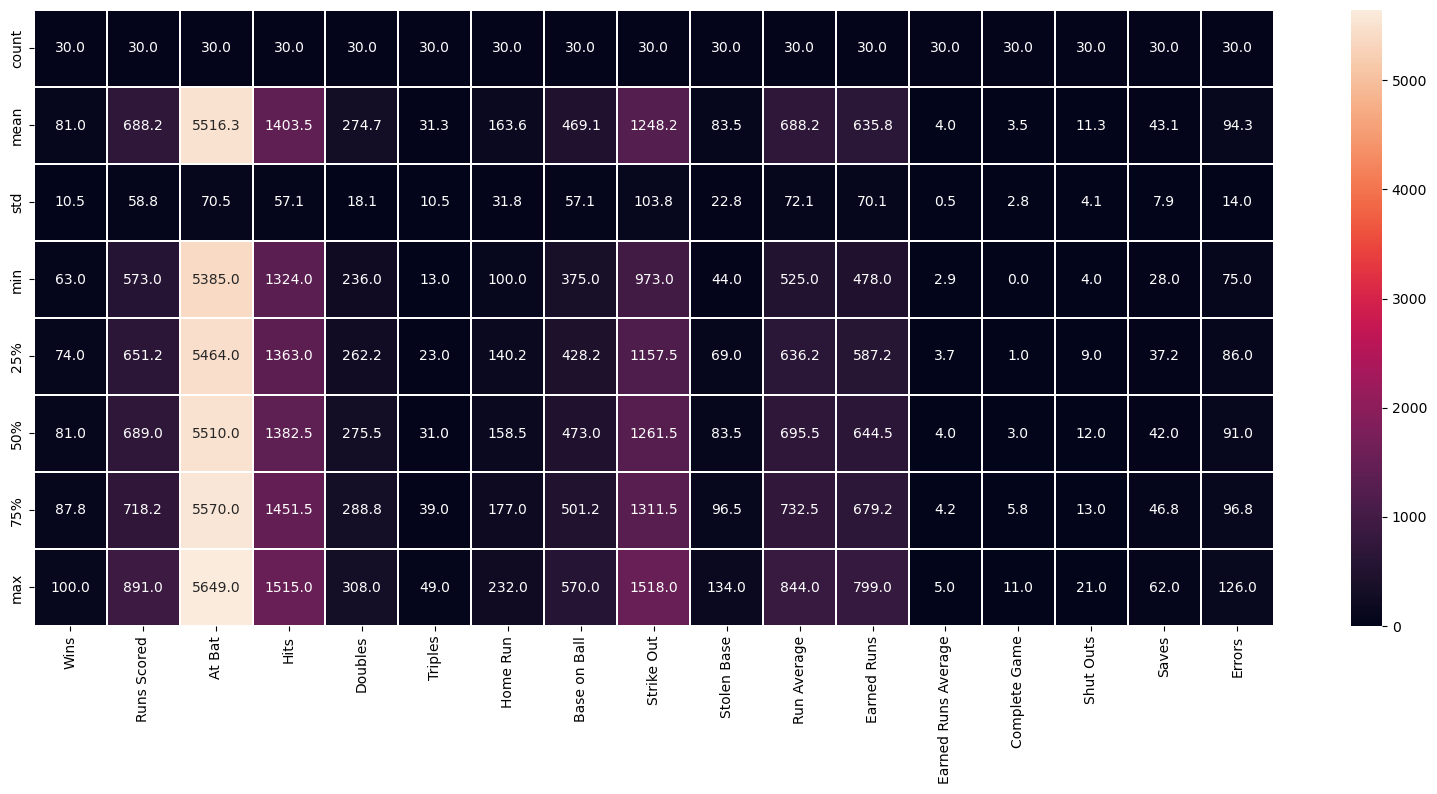

In [8]:
# visualizing the statistics of the column using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(data.describe(),linewidths = 0.1, fmt = '0.1f', annot = True)

In [9]:
data.describe().T

count         mean         std      min        25%  \
Wins                  30.0    80.966667   10.453455    63.00    74.0000   
Runs Scored           30.0   688.233333   58.761754   573.00   651.2500   
At Bat                30.0  5516.266667   70.467372  5385.00  5464.0000   
Hits                  30.0  1403.533333   57.140923  1324.00  1363.0000   
Doubles               30.0   274.733333   18.095405   236.00   262.2500   
Triples               30.0    31.300000   10.452355    13.00    23.0000   
Home Run              30.0   163.633333   31.823309   100.00   140.2500   
Base on Ball          30.0   469.100000   57.053725   375.00   428.2500   
Strike Out            30.0  1248.200000  103.759470   973.00  1157.5000   
Stolen Base           30.0    83.500000   22.815225    44.00    69.0000   
Run Average           30.0   688.233333   72.108005   525.00   636.2500   
Earned Runs           30.0   635.833333   70.140786   478.00   587.2500   
Earned Runs Average   30.0     3.956333    0.454089     2.94     3.6825   
Complete Game         30.0     3.466667    2.763473     0.00     1.0000   
Shut Outs             30.0    11.300000    4.120177     4.00     9.0000   
Saves                 30.0    43.066667    7.869335    28.00    37.2500   
Errors                30.0    94.333333   13.958889    75.00    86.0000   

                          50%      75%      max  
Wins                   81.000    87.75   100.00  
Runs Scored           689.000   718.25   891.00  
At Bat               5510.000  5570.00  5649.00  
Hits                 1382.500  1451.50  1515.00  
Doubles               275.500   288.75   308.00  
Triples                31.000    39.00    49.00  
Home Run              158.500   177.00   232.00  
Base on Ball          473.000   501.25   570.00  
Strike Out           1261.500  1311.50  1518.00  
Stolen Base            83.500    96.50   134.00  
Run Average           695.500   732.50   844.00  
Earned Runs           644.500   679.25   799.00  
Earned Runs Average     4.025     4.22     5.04  
Complete Game           3.000     5.75    11.00  
Shut Outs              12.000    13.00    21.00  
Saves                  42.000    46.75    62.00  
Errors                 91.000    96.75   126.00

**Observation-:**

- If we just look at mean and 50% columns for different features we can see data is sighly right skew for most of features.
- count is same for each variable.
- 75% and max values for errors, shutout, Run scored shows presence of possibe outliers.
- overall all statstical parameter from mean to max, indicate features are seem to be progressing in a definite manner showing no visible abnormalities.
- Heatmap clearly show data need to scale while building ML Model.

**Missing value check**

<Axes: >

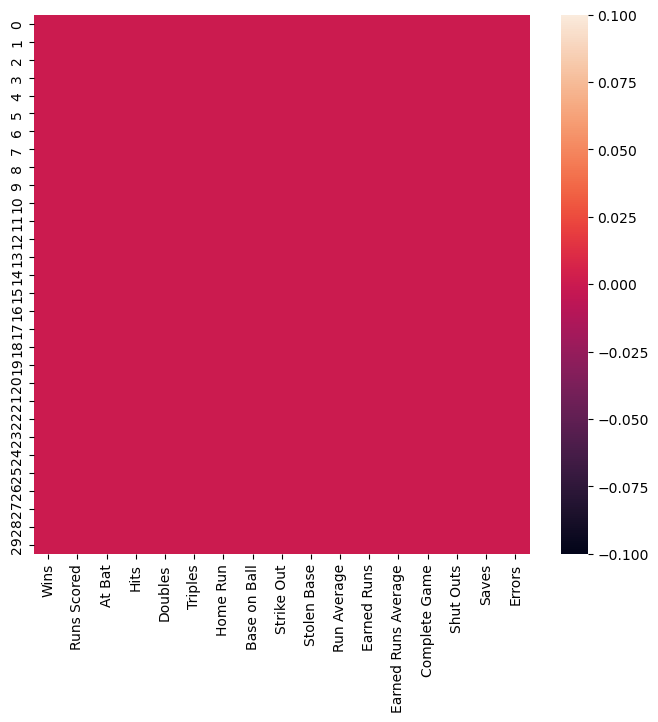

In [10]:
plt.figure(figsize=(8,7))
sns.heatmap(data.isnull())

In [11]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

                     Missing_values  %Missing values
Wins                              0              0.0
Stolen Base                       0              0.0
Saves                             0              0.0
Shut Outs                         0              0.0
Complete Game                     0              0.0
Earned Runs Average               0              0.0
Earned Runs                       0              0.0
Run Average                       0              0.0
Strike Out                        0              0.0
Runs Scored                       0              0.0
Base on Ball                      0              0.0
Home Run                          0              0.0
Triples                           0              0.0
Doubles                           0              0.0
Hits                              0              0.0
At Bat                            0              0.0
Errors                            0              0.0


**Observation-:**

There is no null value present in datsets.

# EDA

Here we can try to bring insight in what feature contribute to win.

# Distribution of features

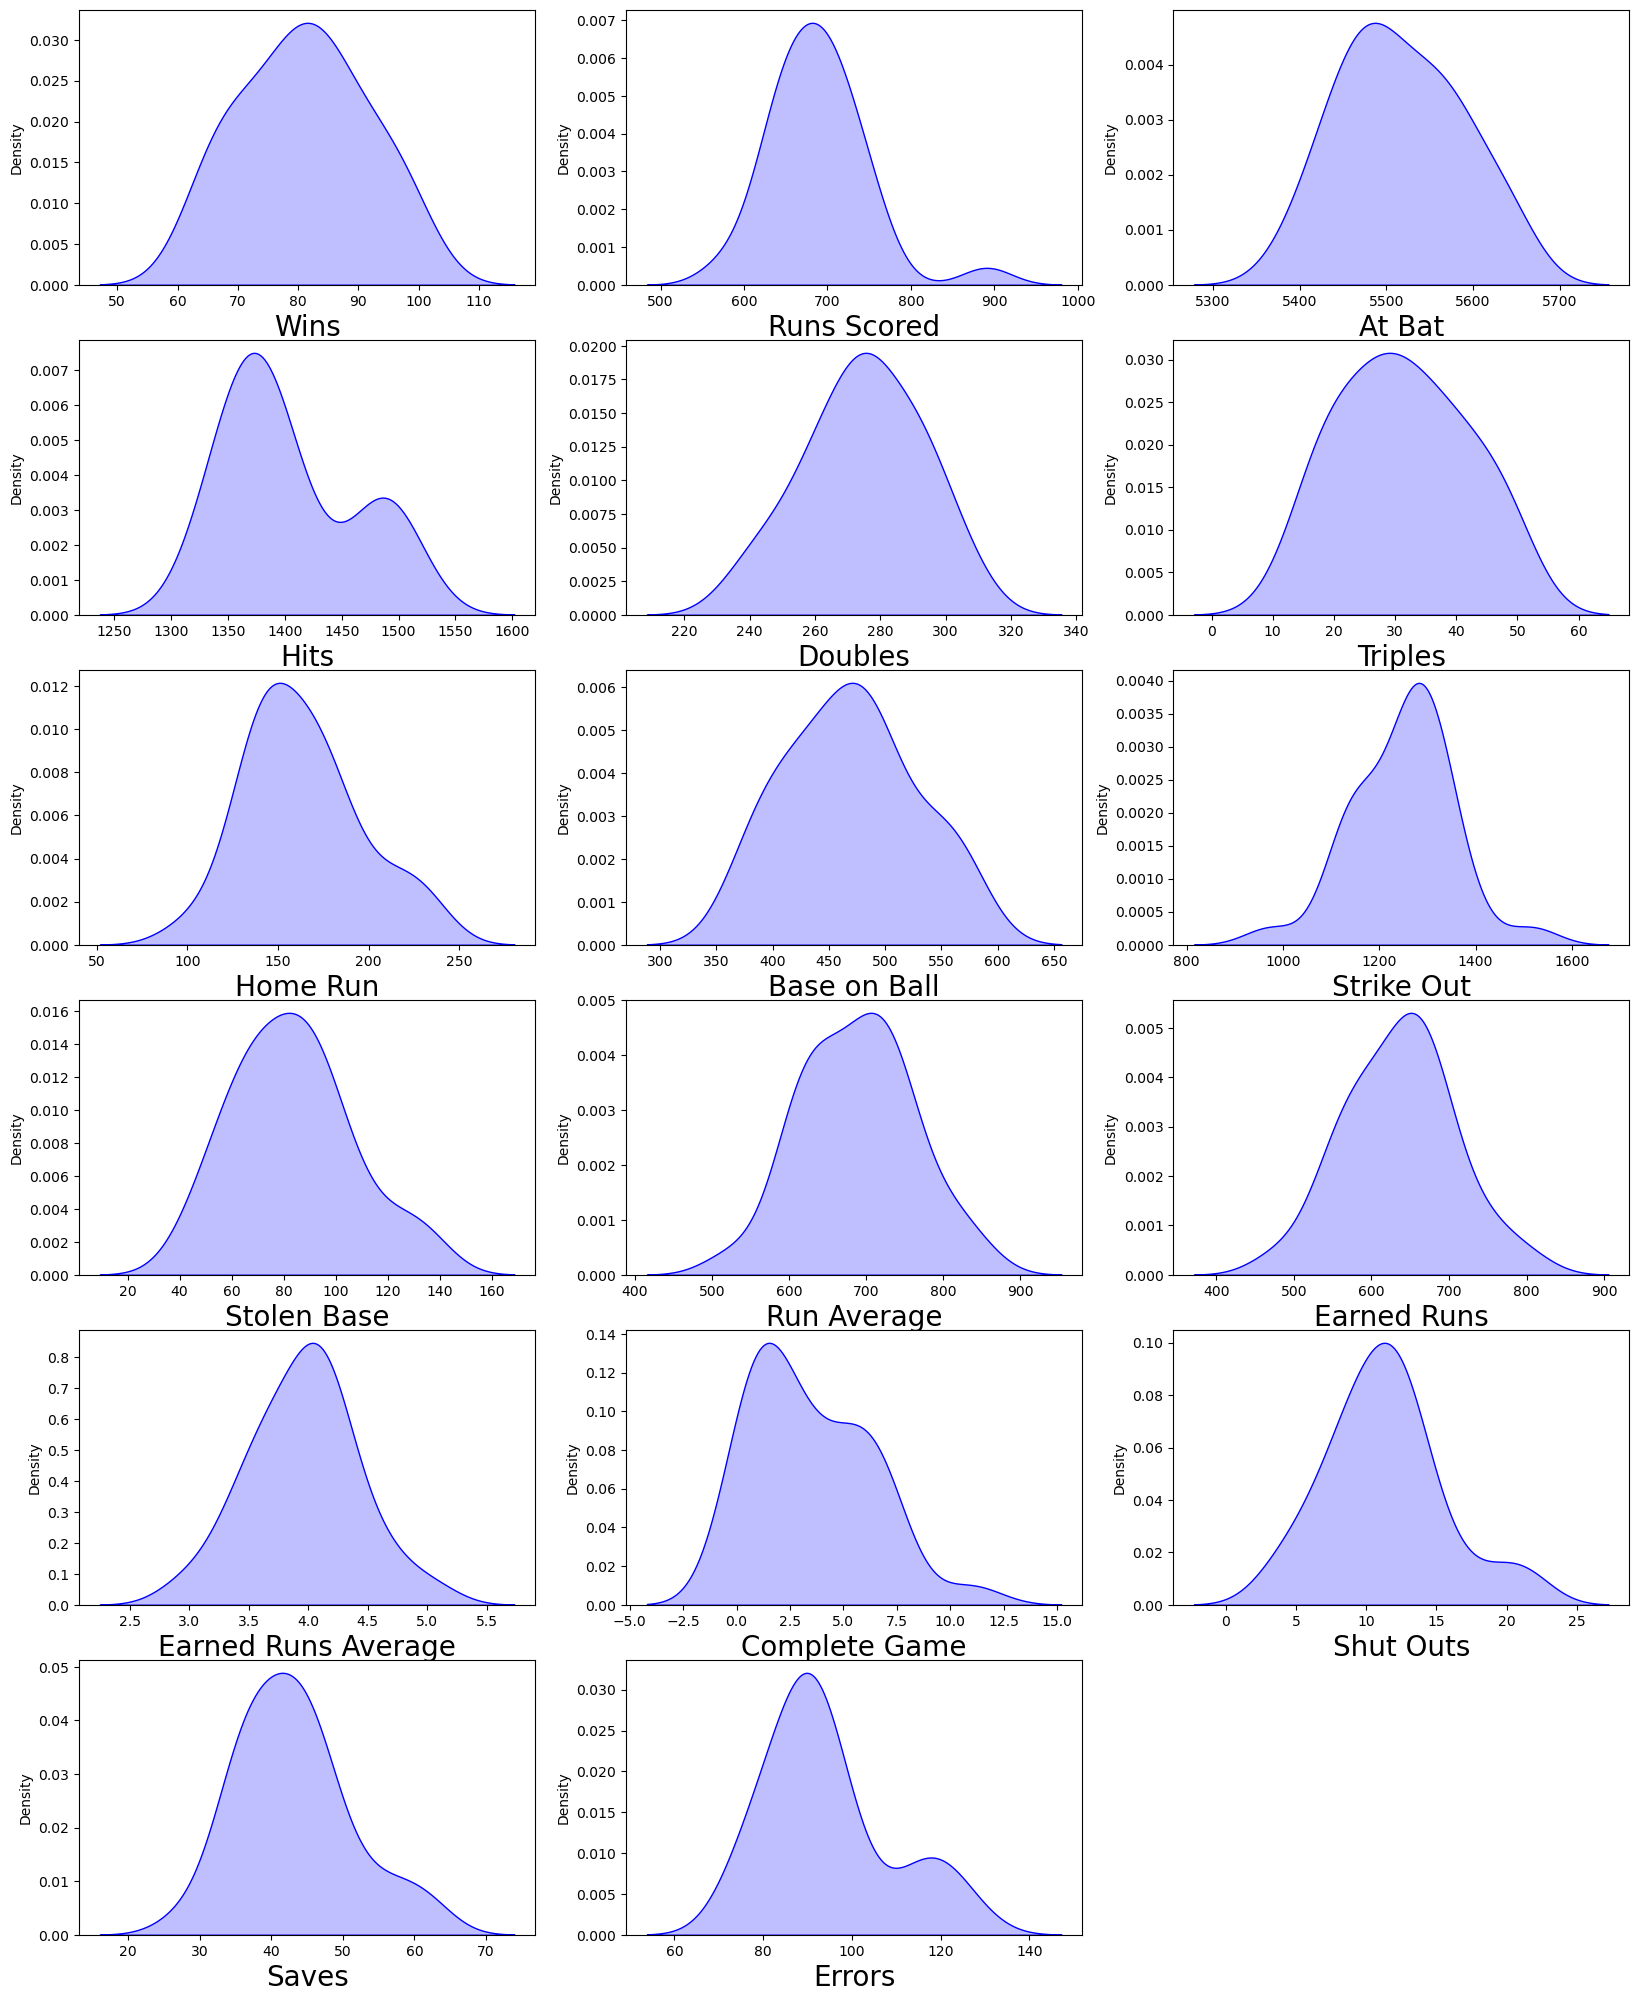

In [12]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber <=17:
        ax = plt.subplot(6,3, plotnumber)
        sns.distplot(data[column], color = 'b', hist = False, kde_kws={"shade":True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

**observation-:**

we can clearly see that some features are either left or right skewed

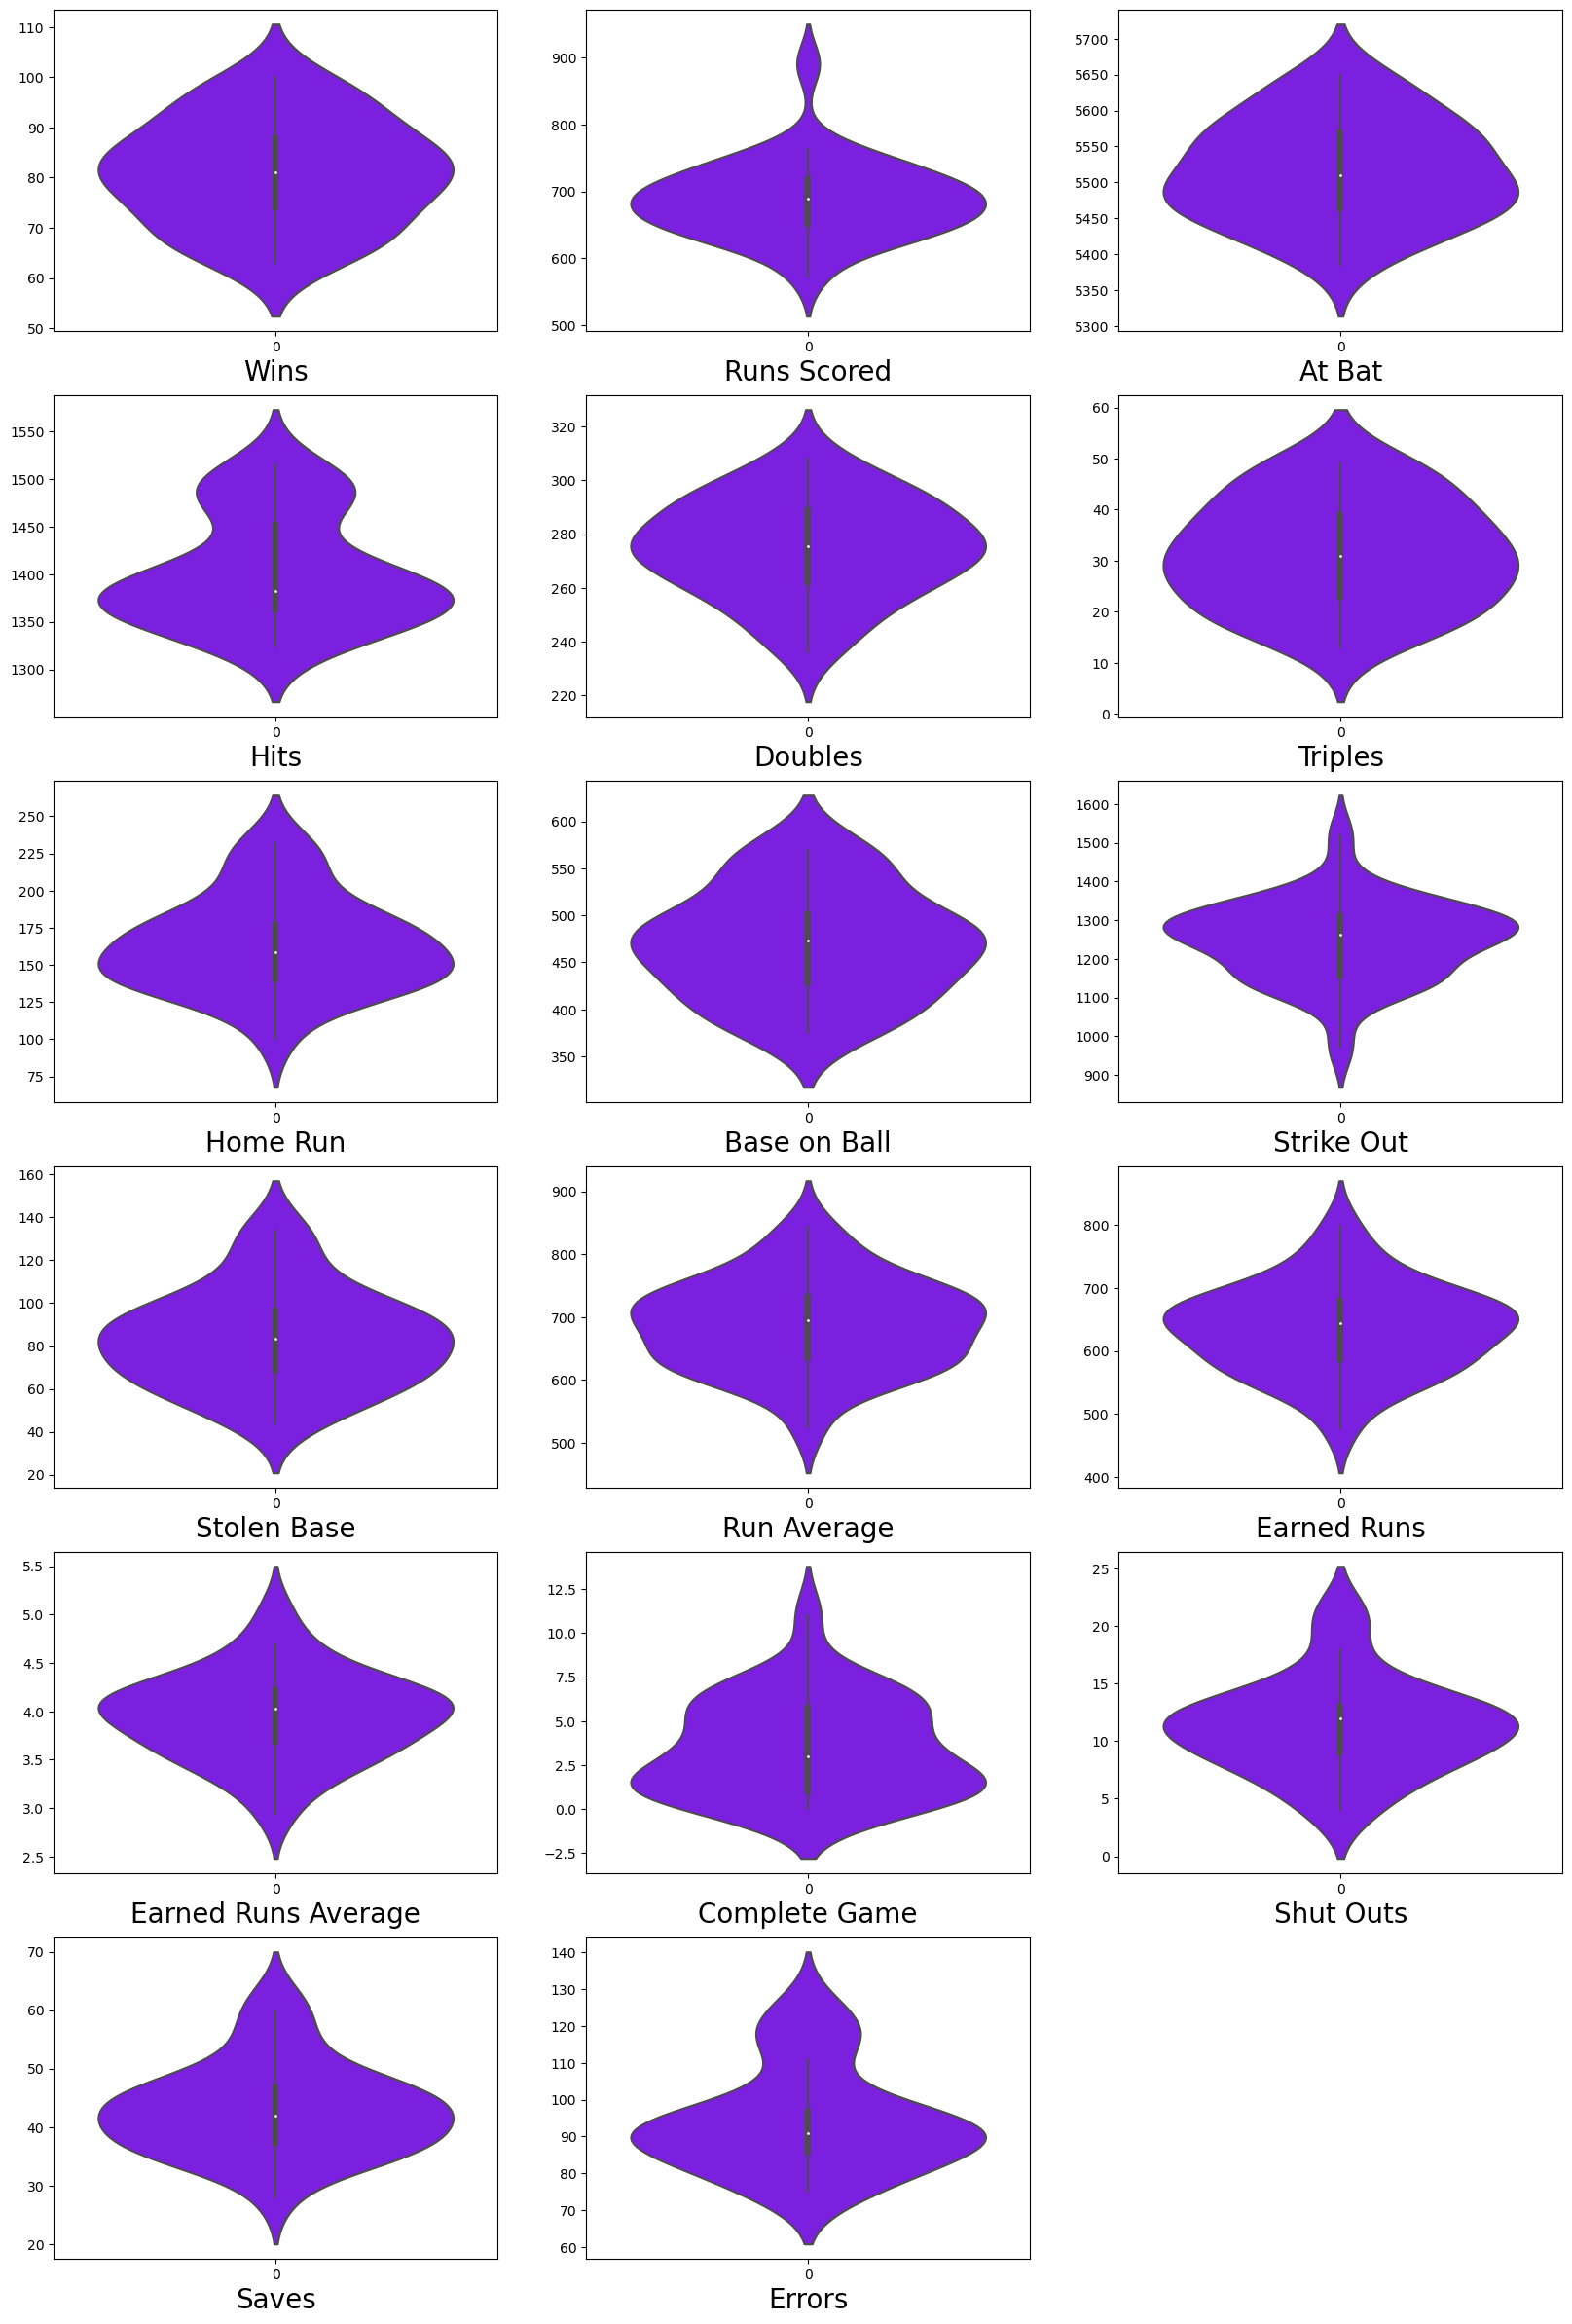

In [13]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.violinplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**Observation-:**

- Shut out and Complete game occur very rarely now a days which can be definately see in violinplot of these variable.
- An error does not count as a hit but still count as an at bat for the batter, so need to dive into how much error are contributing to at bat.


**Let's now investigate Runs and hit togeather, before that let dive into how team get win and some clearity over Run V/S Hits**

**So,Now we will put insights on how many hits convert into runs and inturn lead to win through multivariate analysis**

Text(0, 0.5, 'Hits')

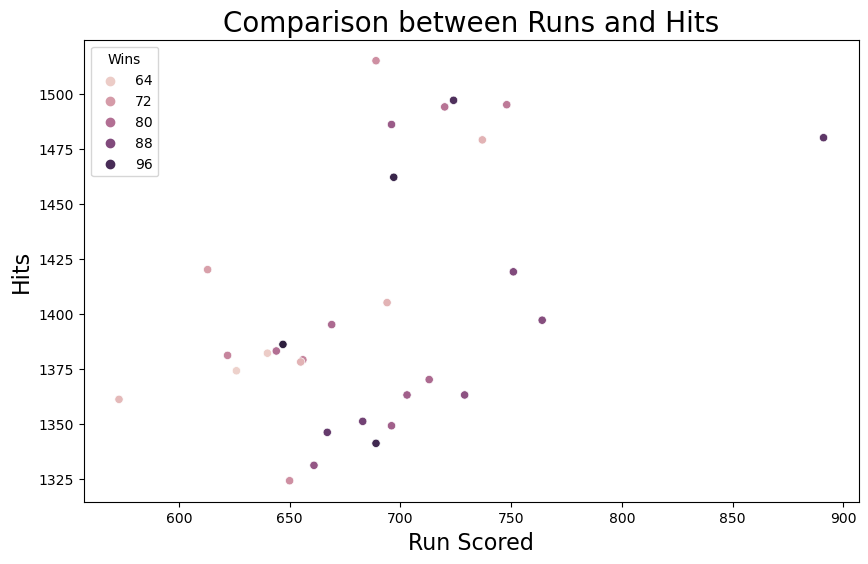

In [14]:
# checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Hits', fontsize = 20)
sns.scatterplot(x='Runs Scored', y='Hits', hue = 'Wins',data=data)
plt.xlabel('Run Scored', fontsize = 16)
plt.ylabel('Hits', fontsize = 16)

**Observation-:**

- Even if numbers of times ball hit bat is less than 1375 still run in range of 650 to 750 contribute to win.
- Very less winning chance for run less than 650 and no of hits less than 1325.

Text(0, 0.5, 'Home Run')

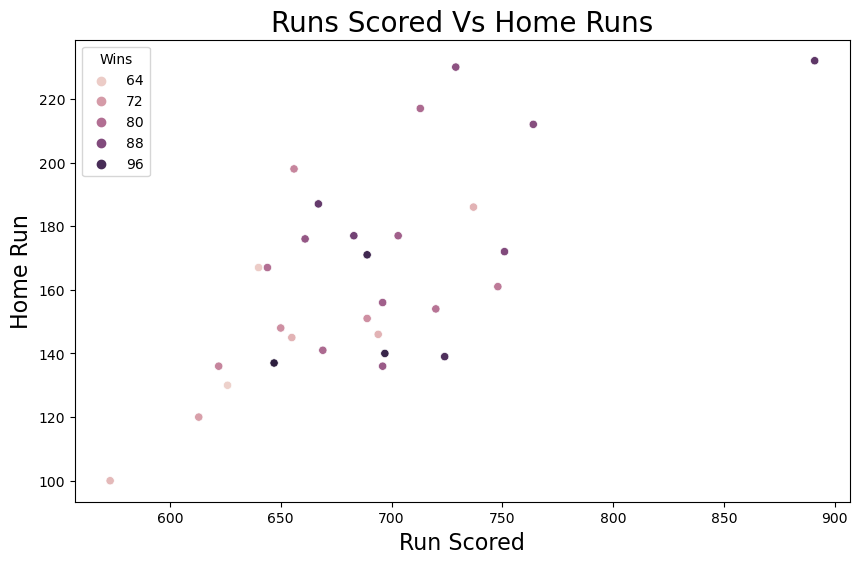

In [15]:
# checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Home Runs', fontsize = 20)
sns.scatterplot(x='Runs Scored', y='Home Run',hue = 'Wins',data=data)
plt.xlabel('Run Scored', fontsize = 16)
plt.ylabel('Home Run', fontsize = 16)

**In conclusionnwe can say that Home runs is definetly contributing factor for team to win but not sufficient to make sure win.**

Text(0, 0.5, 'At Bat')

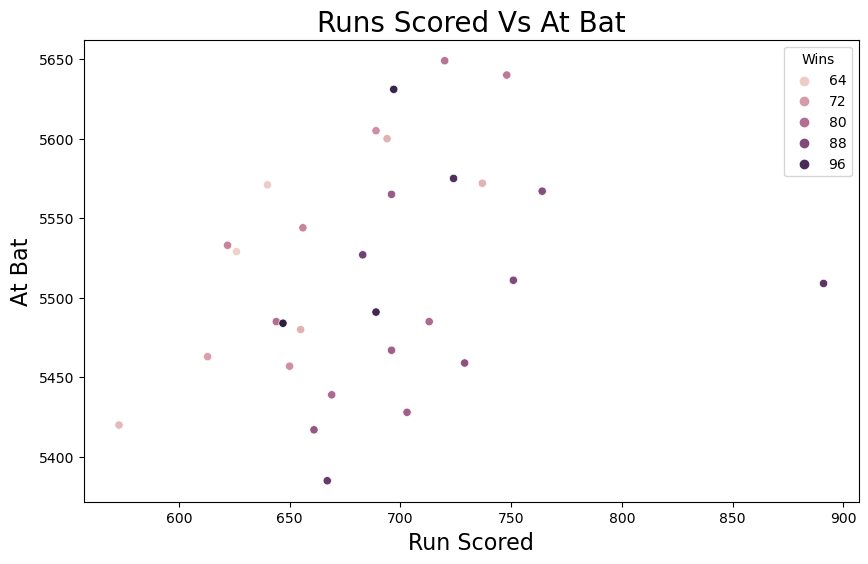

In [16]:
# checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs At Bat', fontsize = 20)
sns.scatterplot(x='Runs Scored', y='At Bat',hue = 'Wins',data=data)
plt.xlabel('Run Scored', fontsize = 16)
plt.ylabel('At Bat', fontsize = 16)

**Observation-:**

- we doesnot get any benchmark range for at bats from here So it is questionable things that how much At Bats matter to winning statstics. Atleast we get here that At bat and Runs Scored has positive linear relationship, which means that more runs scored naturally lead to more at bats.

Text(0, 0.5, 'Strike Out')

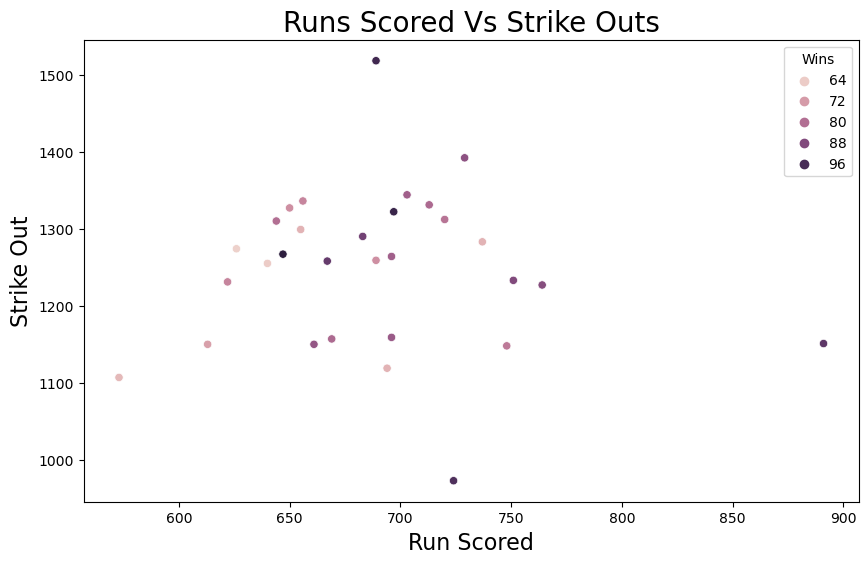

In [17]:
# checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Strike Outs', fontsize = 20)
sns.scatterplot(x='Runs Scored', y='Strike Out',hue = 'Wins',data=data)
plt.xlabel('Run Scored', fontsize = 16)
plt.ylabel('Strike Out', fontsize = 16)

**Observation-:**

- In simple word strike Outs means batter is out. We can see Strike out opponents team below 700 runs essential for win.
- Clearly Strike Out below 1200 is like making recipe for losing game. Strikeout in reguar interval not only led to pressure on opponents in game but also bring break on high run score.

Text(0, 0.5, 'Earned Runs Average')

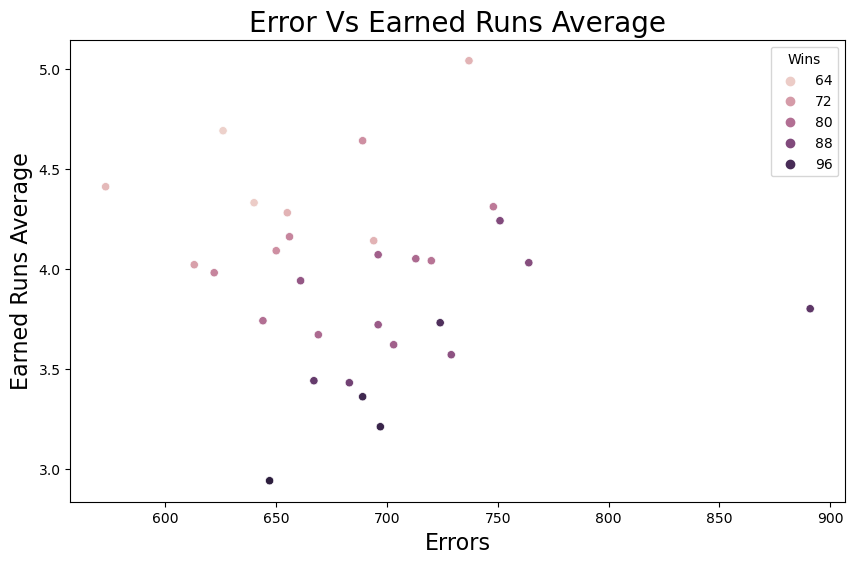

In [18]:
# checking the relation between two variables
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('Error Vs Earned Runs Average', fontsize = 20)
sns.scatterplot(x='Runs Scored', y='Earned Runs Average',hue = 'Wins',data=data)
plt.xlabel('Errors', fontsize = 16)
plt.ylabel('Earned Runs Average', fontsize = 16)

**we can see that in above scatter plot is that minimum error maximum wins. Keeping errors below number 90 can be held as benchmark**

# Boxplot

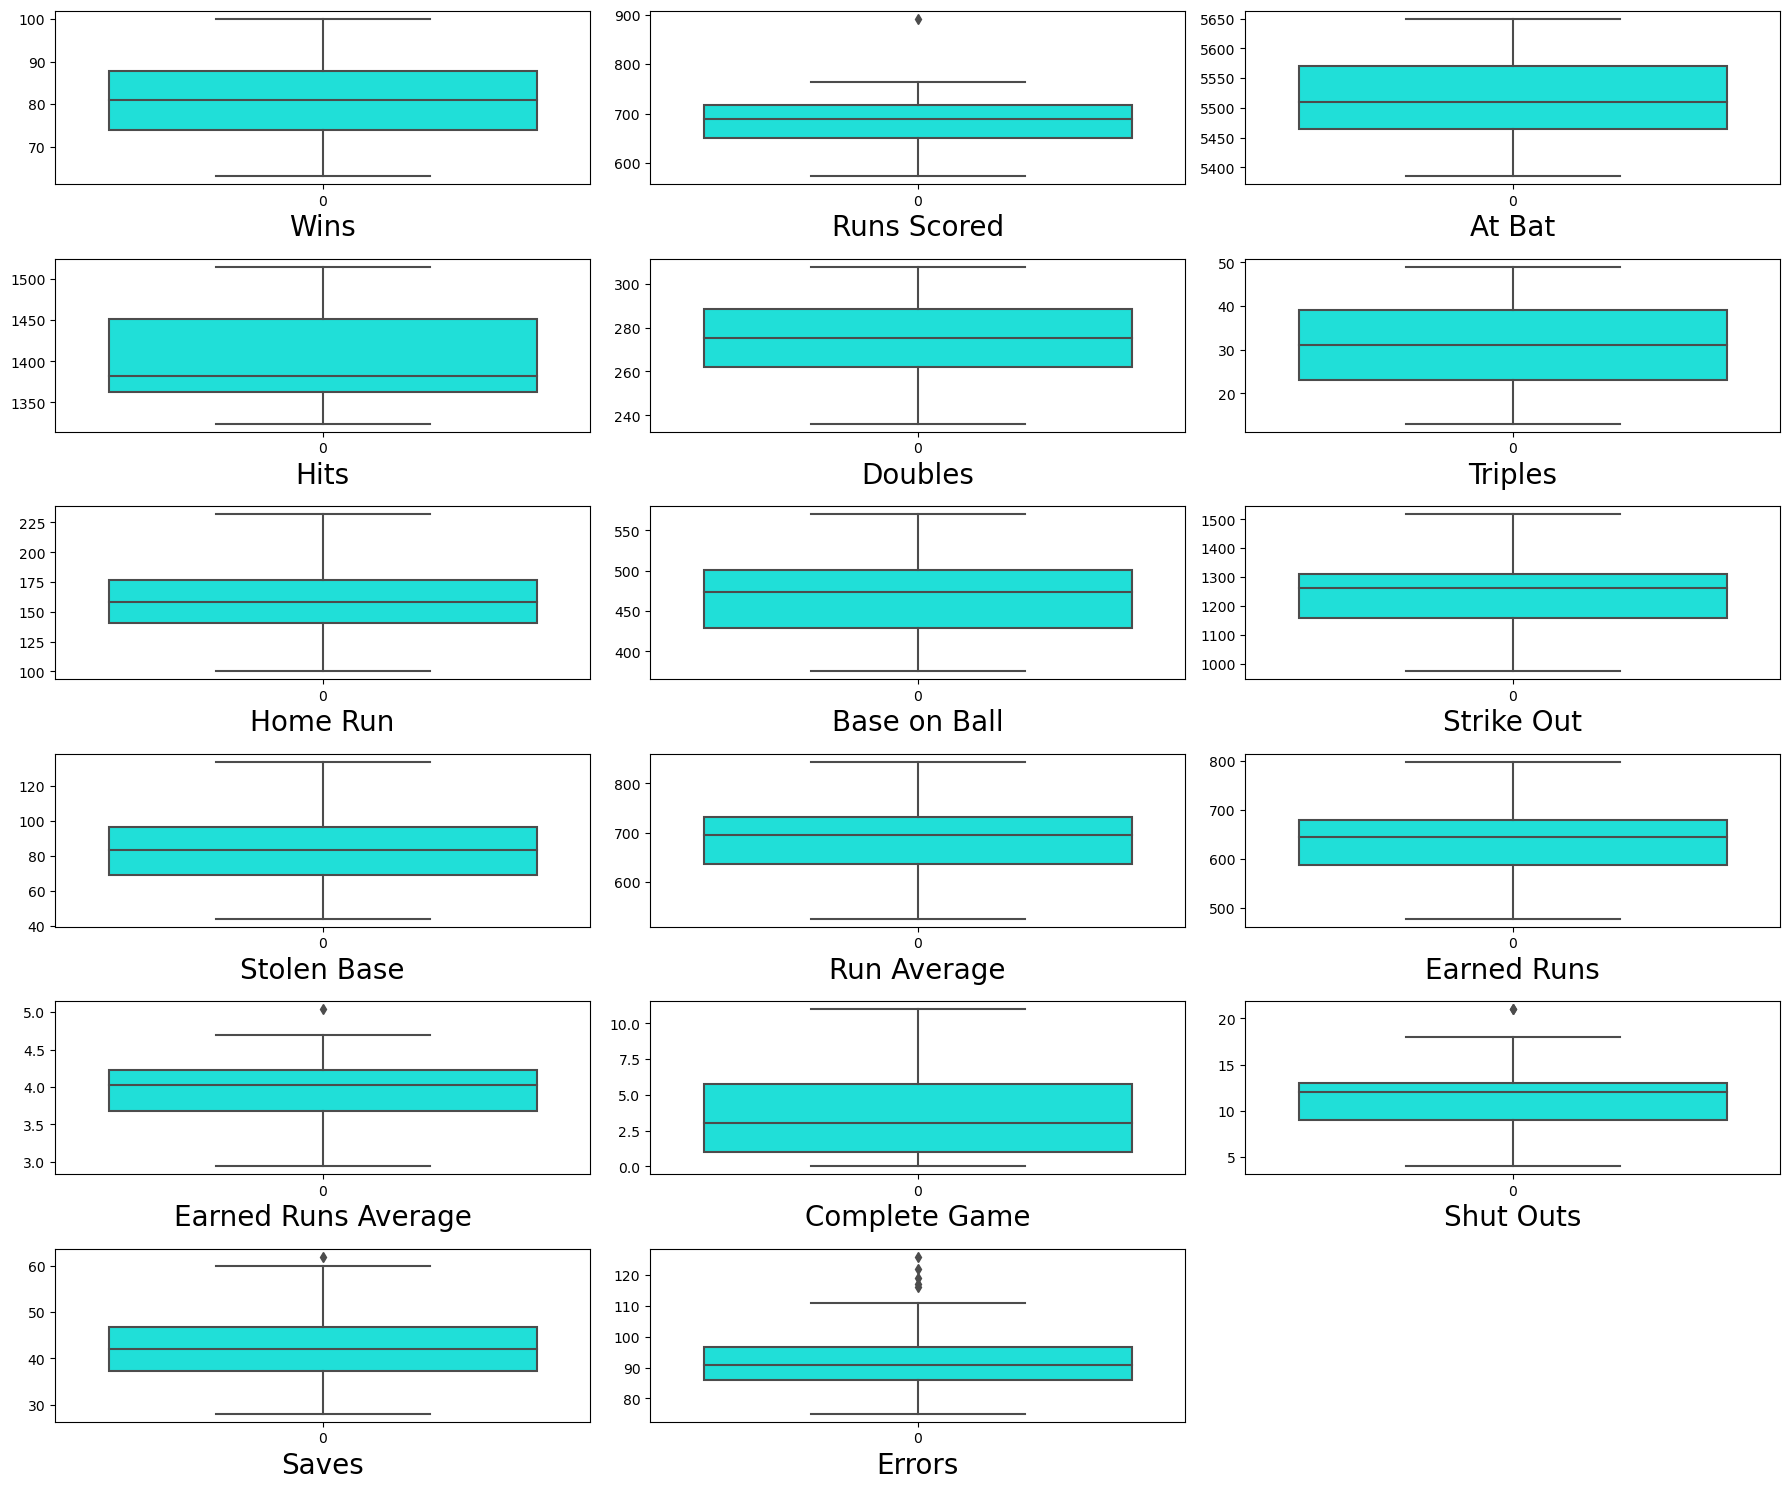

In [19]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in data:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(data[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()
    

**Observation-:**

- There are some outliers present in data. But as data is of Real World MLB 2014, these outlier are valid datapoints.
- Shutouts are rare but completely possible with exceptional performance.
- Run Scored has one outliers but as run is one of the most important parameter, it will be wise to remove corresponding data points.
- Outliers in errors are totally possible so now need to worry about it.

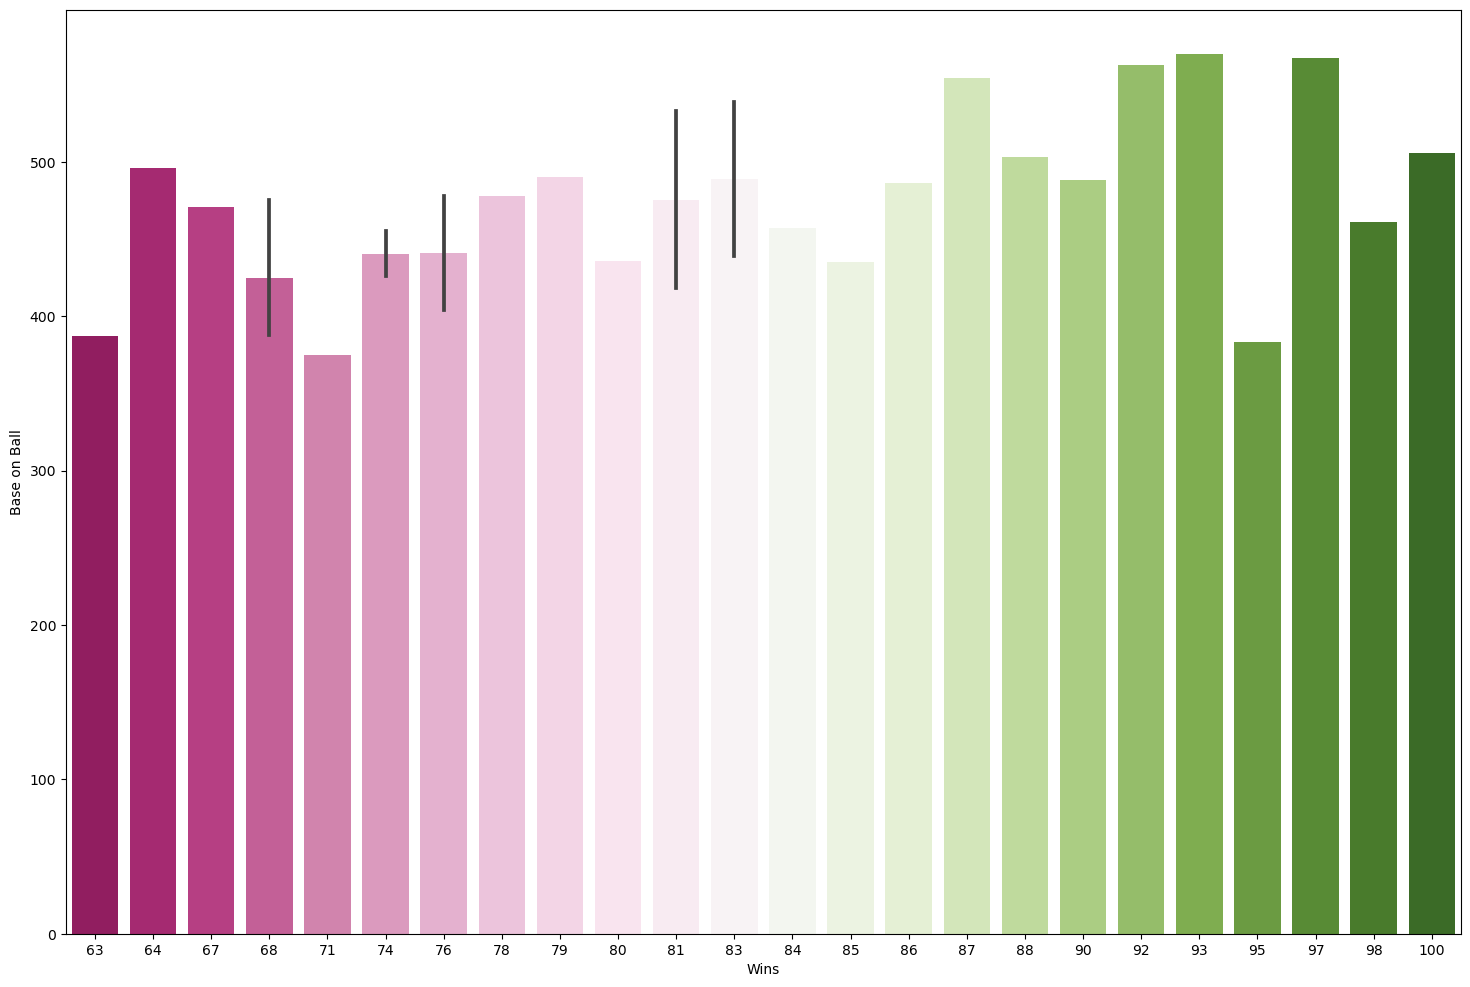

In [20]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Wins', y = 'Base on Ball', data = data, palette='PiYG')
plt.show()

**Observation-:**

- Base on ball is contribution from pitcher to batter for winning. In simple word it is like Wide or No ball in cricket
- we can see that base on ball above 400 really contribute in wins in team.

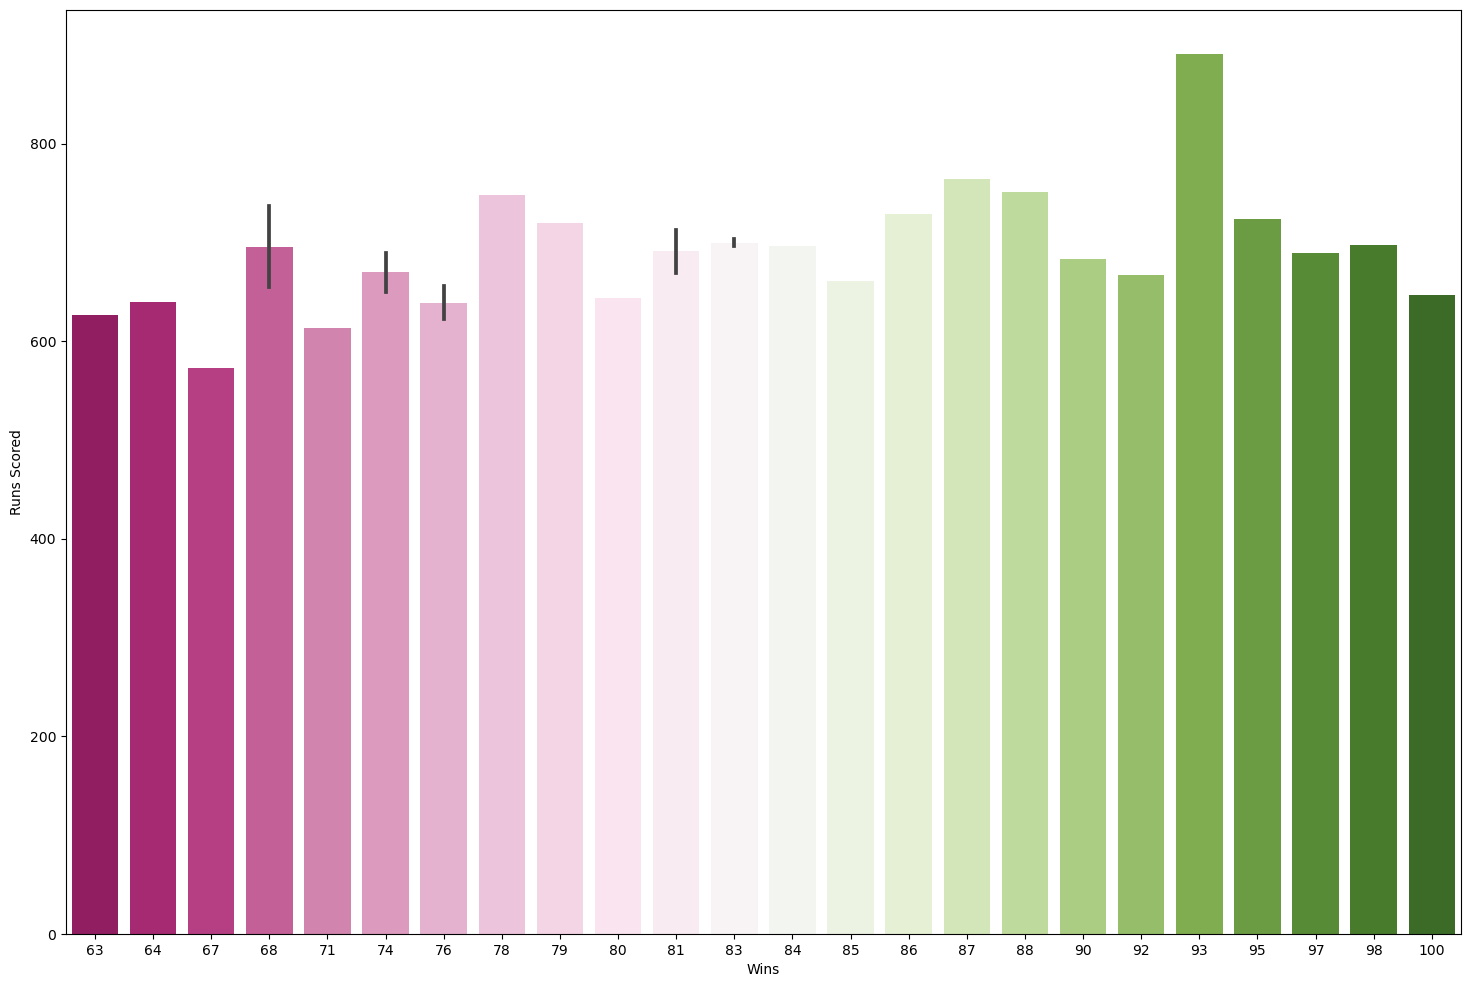

In [21]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Wins', y = 'Runs Scored', data = data, palette='PiYG')
plt.show()

**Observation -:** Run Scored above 600 is benchmark for winning in any scenerio

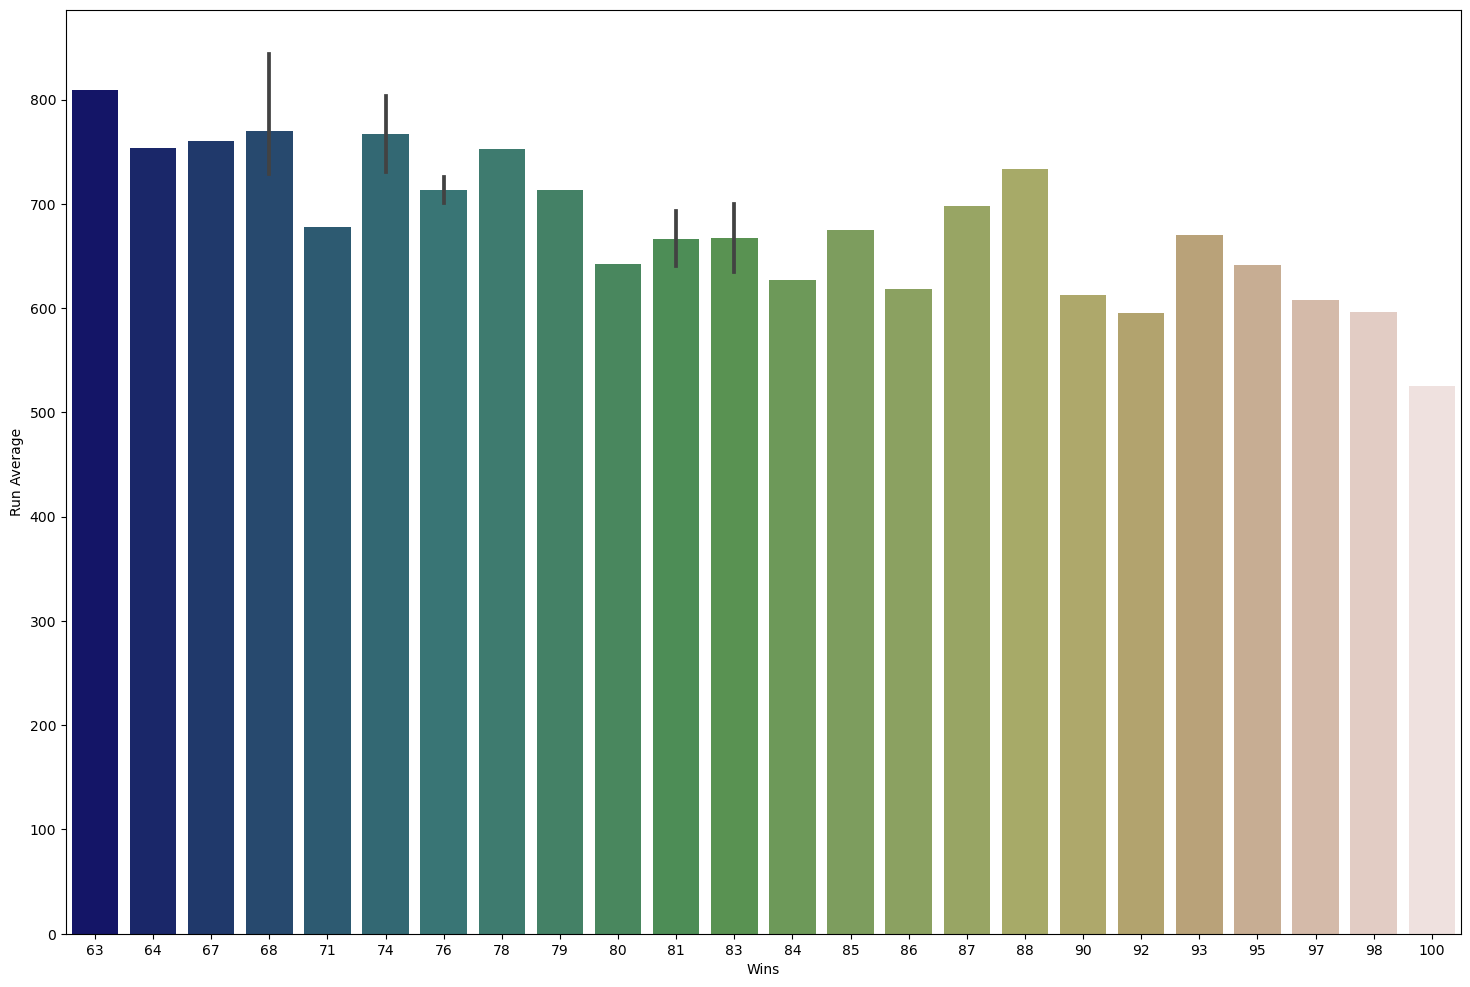

In [22]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Wins', y = 'Run Average', data = data, palette='gist_earth')
plt.show()

**Observation-:**

- Here Comes Intresting plot, we can see Run Average decrease with increase in number of wins.But why this trend if more runs means directly increase chance of winnings.

**Let's try find answer of this million dollor puzzles by dividing more relation of wins with parameter like ERA, Strikeout.**

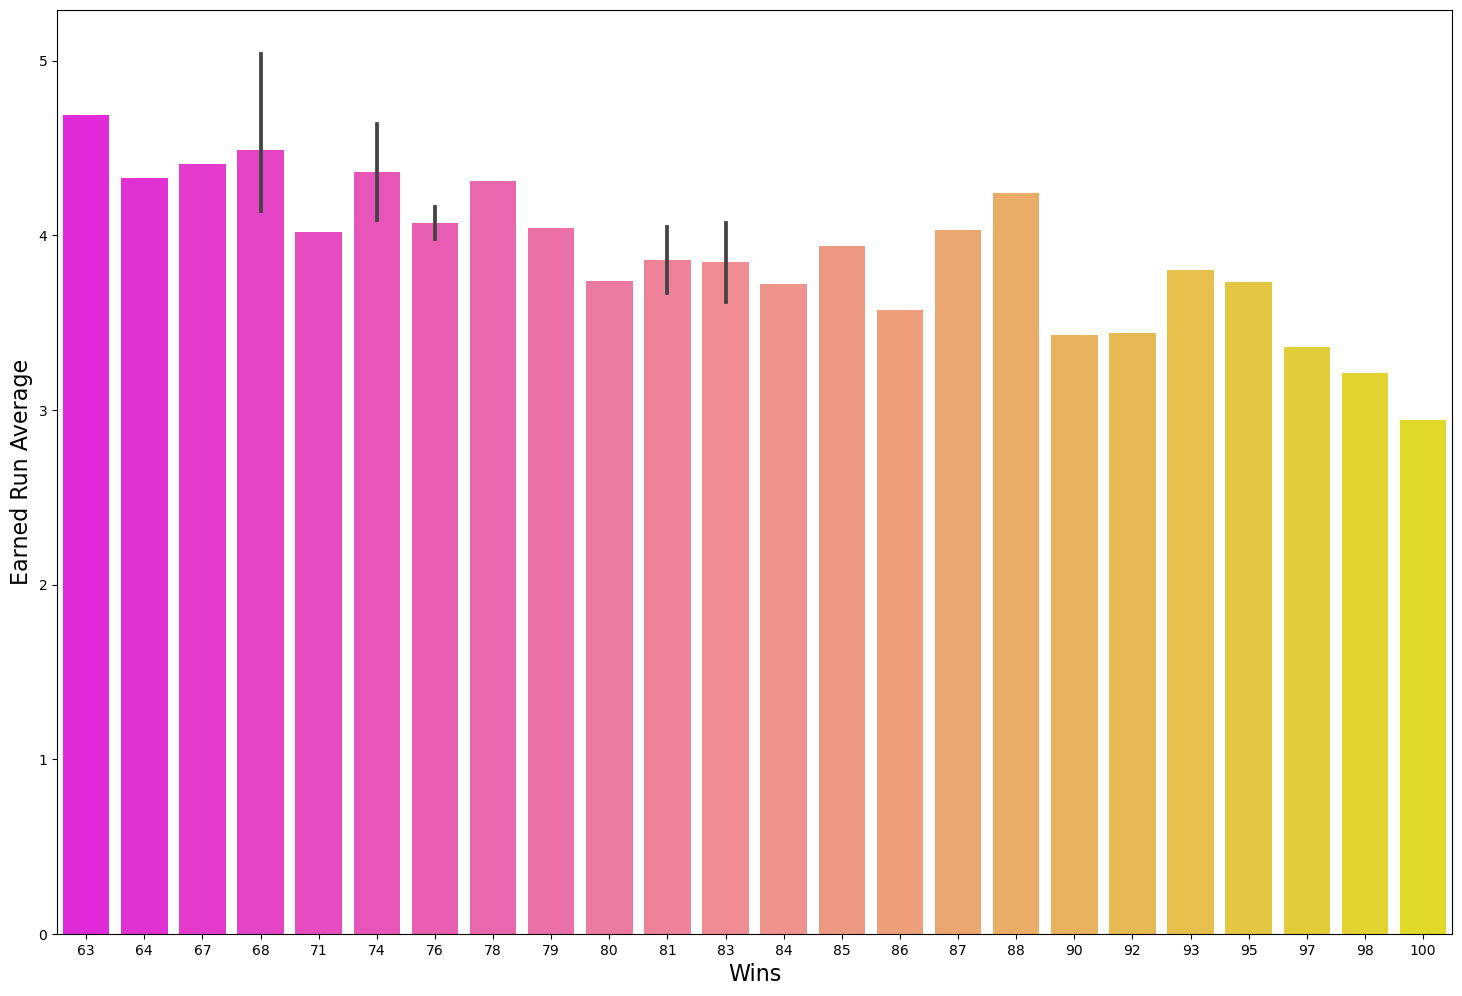

In [23]:
plt.figure(figsize=(18,12))
sns.barplot(x='Wins', y = 'Earned Runs Average',data = data, palette = 'spring')
plt.xlabel('Wins', fontsize = 16)
plt.ylabel('Earned Run Average',fontsize = 16)
plt.show()

**Observation-:**

**And here we got what we looking for. As we thought there must be atleast one pitcher parameter where this decreasing trend must be reflected.**

- ERA is low for maximum wins. Low ERA by pitcher clearly means that pitcher is giving less chance given to better to score runs.
- We already come to conclusion of keeping ERA less than 3.5 previous result. This plot also support that story.
- But this also indicate that ERA and Runs Average Score are bound to related with each other in linear relationship.

**Let check it through strip plot between Run Average and Earned Run Average**

Text(0, 0.5, 'Earned Runs Average')

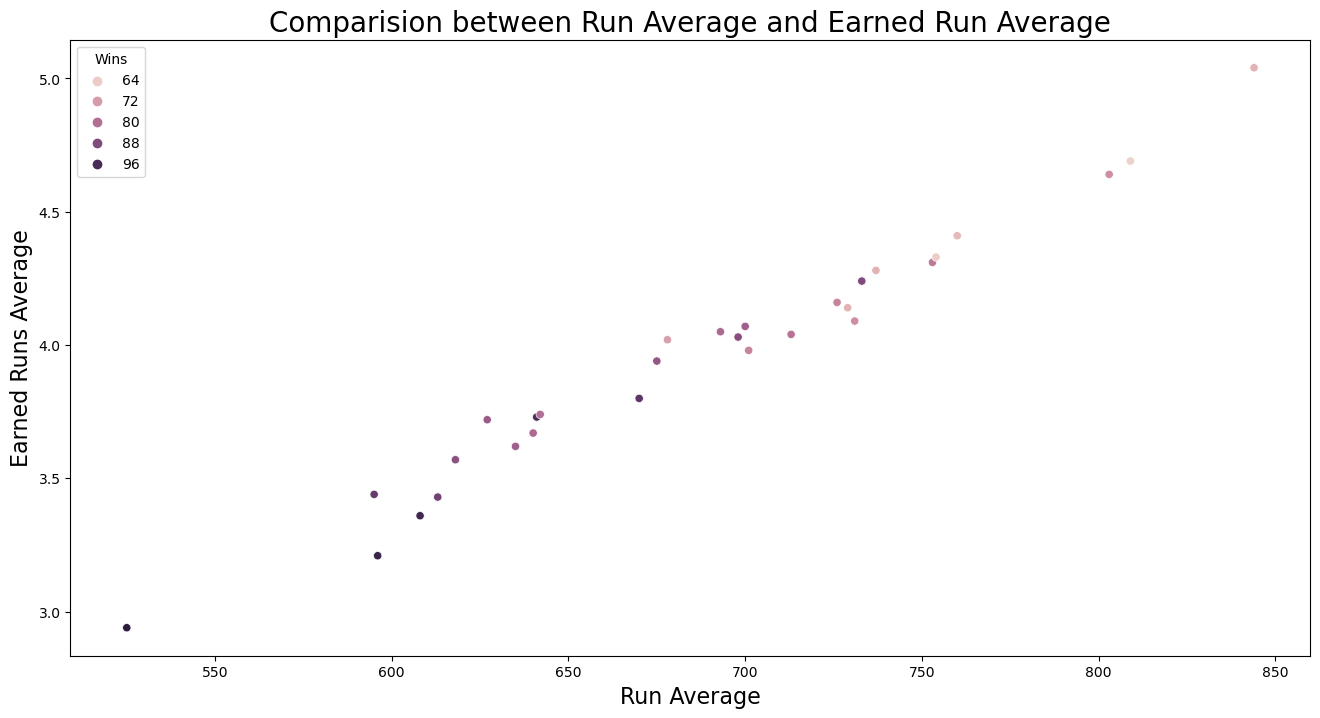

In [24]:
#Checking the relationship between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparision between Run Average and Earned Run Average', fontsize = 20)
sns.scatterplot(x='Run Average', y='Earned Runs Average',hue = 'Wins',data=data)
plt.xlabel('Run Average', fontsize = 16)
plt.ylabel('Earned Runs Average', fontsize = 16)

**Observation-:** Here we got what we suspect in previous plot. ERA and RA hold linear relationship.

**Now check strikeout shows same behaviours as ERA with respect to run average**

Text(0, 0.5, 'Strike Out')

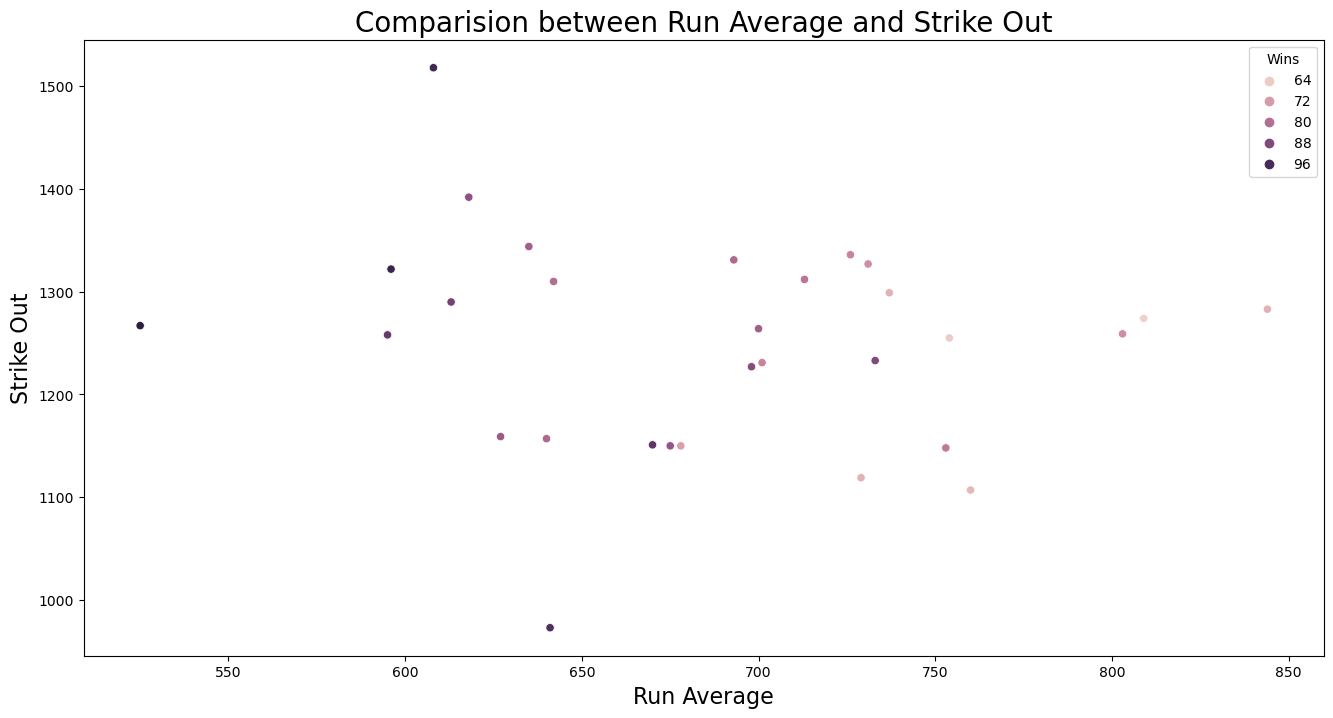

In [25]:
#Checking the relationship between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparision between Run Average and Strike Out', fontsize = 20)
sns.scatterplot(x='Run Average', y='Strike Out',hue = 'Wins',data=data)
plt.xlabel('Run Average', fontsize = 16)
plt.ylabel('Strike Out', fontsize = 16)

**Observation-:** Strike outs are randomly placed giving not much any significant insights.Most probably strike out doesn't matter.

**There is one outlier in Runs Score, let's check that entry**

In [26]:
data['Runs Scored'].max()

891

In [27]:
data.loc[data['Runs Scored']==891]

Wins  Runs Scored  At Bat  Hits  Doubles  Triples  Home Run  Base on Ball  \
5    93          891    5509  1480      308       17       232           570   

   Strike Out  Stolen Base  Run Average  Earned Runs  Earned Runs Average  \
5        1151           88          670          609                  3.8   

   Complete Game  Shut Outs  Saves  Errors  
5              7         10     34      88

it seems like highest Doubles, Homeruns and baseball also belong to this entry.Let's cross check

In [28]:
data['Home Run'].max(), data['Base on Ball'].max(),data['Doubles'].max()

(232, 570, 308)

Here we got what we suspect.

**In one of the previous result we suspects that earned run/earned run average and wins must have negative relationship, let check by looking at jointplot**

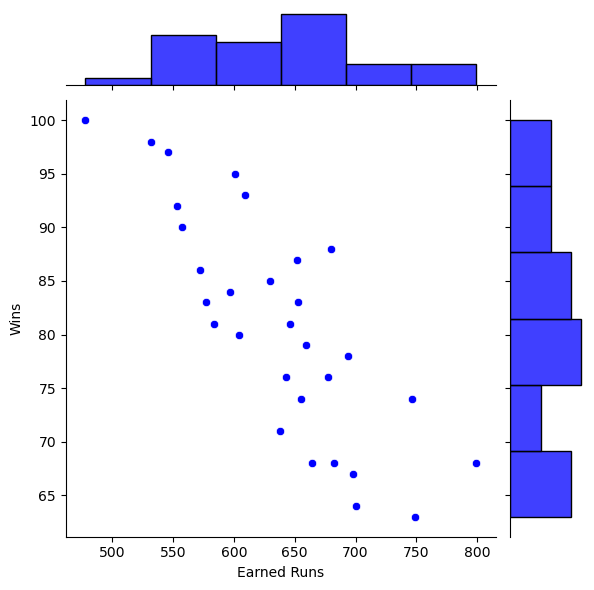

In [29]:
 sns.jointplot(x='Earned Runs', y = 'Wins', data = data, color = 'blue', palette='Set1')

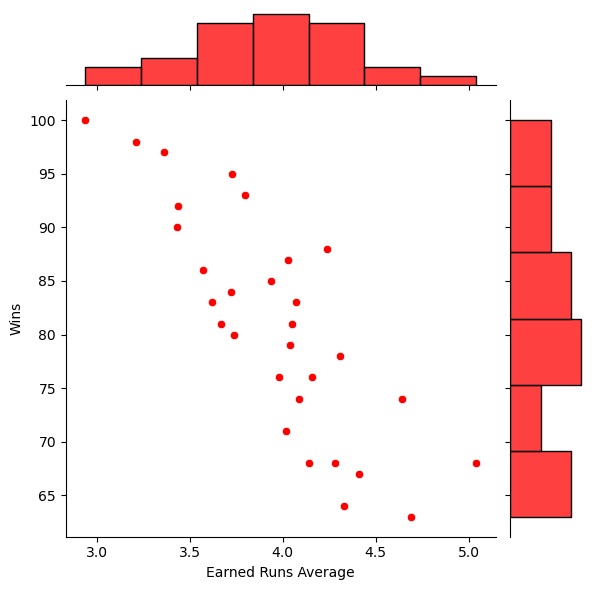

In [30]:
sns.jointplot(x='Earned Runs Average', y = 'Wins', data = data, color = 'red', palette='Set1')

**Jointplot shows same story about Earned Run/ Earned Runs Average and wins having linear negative relationship**

# Let Check relationship between saves and wins

<Figure size 1000x1000 with 0 Axes>

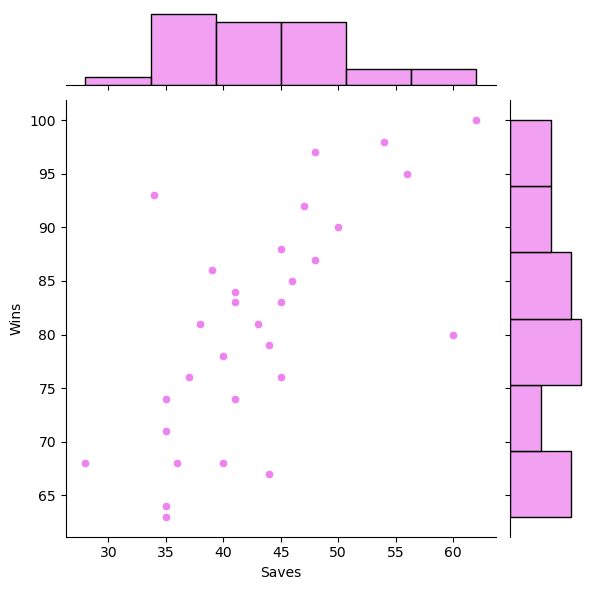

In [31]:
plt.figure(figsize=(10,10))
sns.jointplot(x='Saves',y = 'Wins', data = data, color = 'violet')

**Observation-:**

- A save is rewarded to the relief pitcher who finishes a game for the winning team under certain circumstances
- Here with increase in the number of save increase the number of wins.

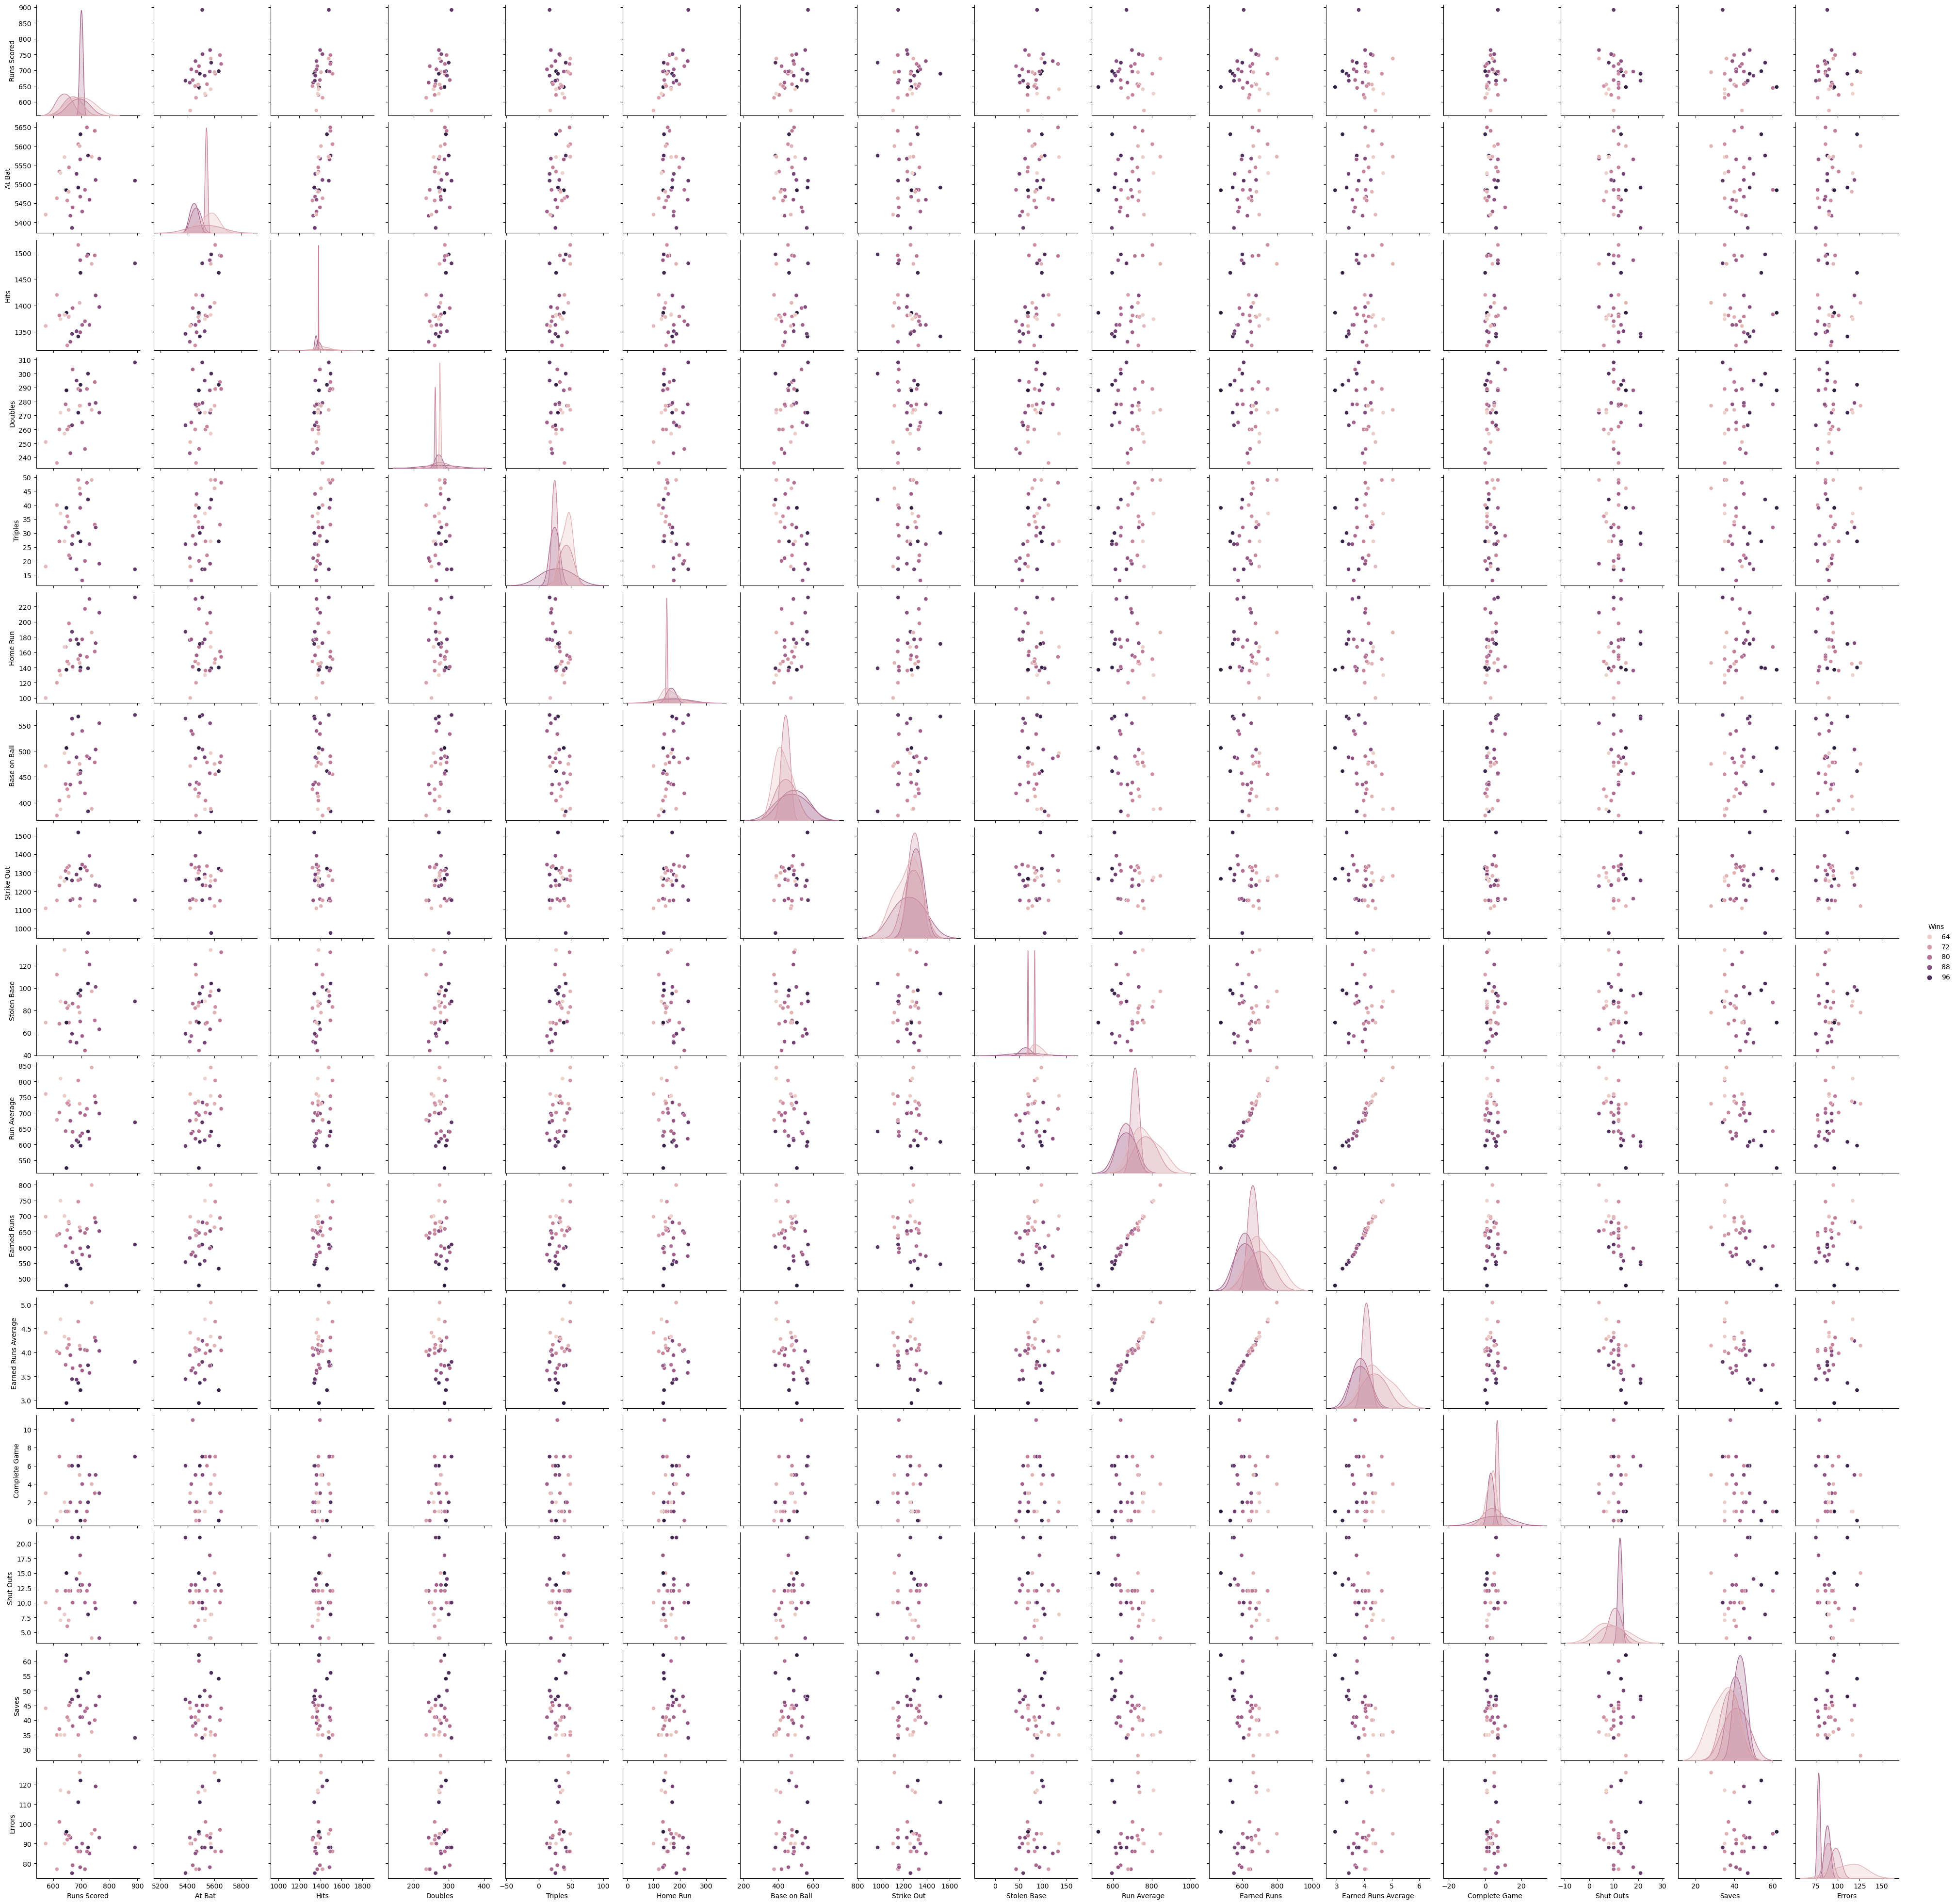

In [32]:
sns.pairplot(data,hue='Wins')

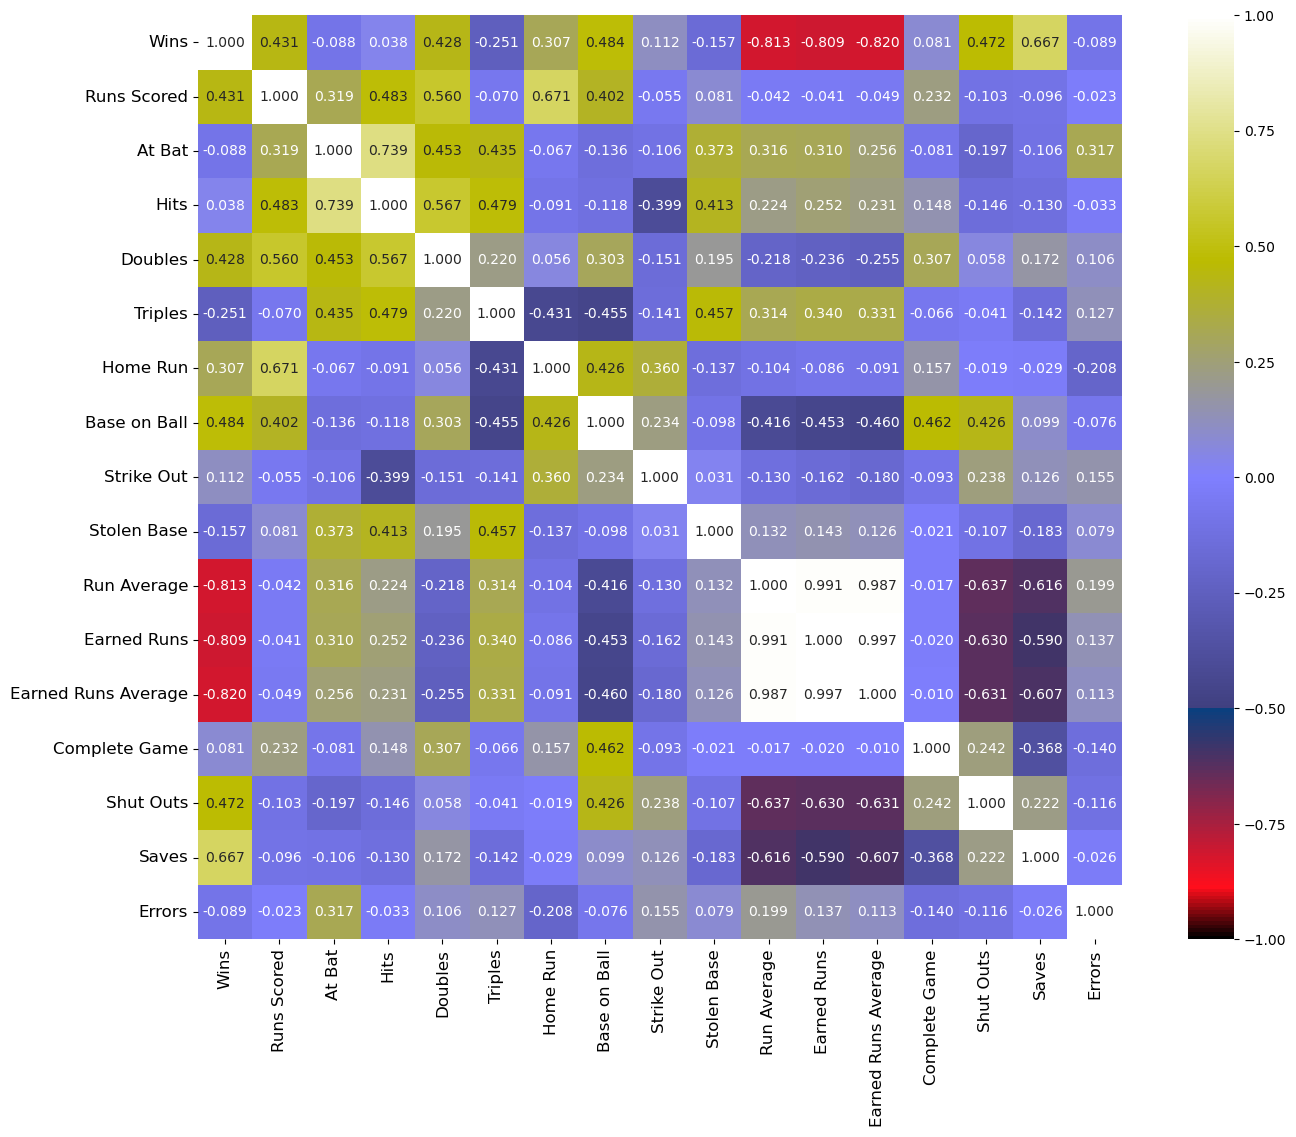

In [33]:
plt.figure(figsize=(17,12))
sns.heatmap(data.corr(),vmin=-1,vmax = 1, annot = True, square = True, fmt='0.3f',
           annot_kws={'size':10},cmap='gist_stern')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Outlier detection and removal

In [34]:
from scipy.stats import zscore

z = np.abs(zscore(data))
threshold = 3
daa = data[(z<3).all(axis = 1)]

In [35]:
print("Shape of dataset after removing outliers", daa.shape)

Shape of dataset after removing outliers (29, 17)


**Data Loss**

In [36]:
print("Percentage Data Loss",((30-29)/30)*100,'%')

Percentage Data Loss 3.3333333333333335 %


# Feature Selection and Engineering

**1.Skewness of features**

In [37]:
data.skew()

Wins                   0.047089
Runs Scored            1.200786
At Bat                 0.183437
Hits                   0.670254
Doubles               -0.230650
Triples                0.129502
Home Run               0.516441
Base on Ball           0.158498
Strike Out            -0.156065
Stolen Base            0.479893
Run Average            0.045734
Earned Runs            0.058710
Earned Runs Average    0.053331
Complete Game          0.736845
Shut Outs              0.565790
Saves                  0.657524
Errors                 0.890132
dtype: float64

**Observation-:**

- opimal range for skewness is -0.5 to 0.5
- Hits, Complete Game, shuts outs, saves, error are possitively skewed in nature, need to transform.

# Transforming positive or right skew data using boxcox transformation 

In [38]:
from scipy.stats import boxcox

In [39]:
daa['Hits']=boxcox(daa['Hits'],0.5)

In [40]:
daa['Shut Outs']=boxcox(daa['Shut Outs'],0.5)

In [41]:
daa['Saves']=boxcox(daa['Saves'],0.5)

**Other features not able transform by boxcox Mehtods as they showing data must be positive. So other columns are transform using yeo-johnson mehtod.**

In [42]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [43]:
EC=['Errors','Complete Game']
ds = daa[EC].copy()

In [44]:
column_tran = ColumnTransformer(
 [("Errors",PowerTransformer (method='yeo-johnson', standardize = True),['Errors']),
 ('Complete Game',PowerTransformer(method='yeo-johnson', standardize=True),['Complete Game'])])
transformed_yeojohnson =column_tran.fit_transform(daa)
new_cols = ['Errors', 'Complete Game']
dataset=pd.DataFrame(transformed_yeojohnson, columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset], axis=1)
dataset.head()

Errors  Complete Game
0 -0.348265      -0.307098
1 -0.540820      -0.307098
2 -1.326125       2.011315
3  0.650818       1.264463
4 -0.540820       1.264463

In [45]:
#reseting index and mergining transform data
daa.reset_index(drop=True, inplace=True)
dataset.index=daa.index
daa[EC]=dataset[EC]

# Skewness after transforming features

In [46]:
daa.skew()

Wins                   0.119013
Runs Scored           -0.215364
At Bat                 0.169573
Hits                   0.761274
Doubles               -0.335304
Triples                0.090124
Home Run               0.450862
Base on Ball           0.151193
Strike Out            -0.233815
Stolen Base            0.494966
Run Average            0.018155
Earned Runs            0.018461
Earned Runs Average    0.016693
Complete Game         -0.045947
Shut Outs             -0.085802
Saves                  0.370280
Errors                 0.065585
dtype: float64

- **All features skewness is now transform within permissible limit of -0.5 to 0.5 as shown above.**

# Correlation

In [47]:
daa.corr()

Wins  Runs Scored    At Bat      Hits   Doubles  \
Wins                 1.000000     0.390451 -0.085780 -0.019562  0.384886   
Runs Scored          0.390451     1.000000  0.438022  0.432903  0.469293   
At Bat              -0.085780     0.438022  1.000000  0.769684  0.490752   
Hits                -0.019562     0.432903  0.769684  1.000000  0.527700   
Doubles              0.384886     0.469293  0.490752  0.527700  1.000000   
Triples             -0.206737     0.134204  0.445604  0.580906  0.342419   
Home Run             0.245697     0.586894 -0.064653 -0.218968 -0.098695   
Base on Ball         0.447513     0.258450 -0.137850 -0.222036  0.211243   
Strike Out           0.156469     0.081158 -0.111243 -0.372596 -0.096772   
Stolen Base         -0.169503     0.075323  0.373674  0.419058  0.194308   
Run Average         -0.823176    -0.013858  0.315499  0.244127 -0.215196   
Earned Runs         -0.815308     0.007727  0.309146  0.280268 -0.224993   
Earned Runs Average -0.826952    -0.009122  0.254872  0.256176 -0.248212   
Complete Game        0.007696     0.155122 -0.059648  0.072116  0.227220   
Shut Outs            0.477949    -0.119300 -0.193987 -0.127917  0.088345   
Saves                0.754886     0.071589 -0.127766 -0.090078  0.258675   
Errors              -0.079633     0.039865  0.332002 -0.021890  0.152541   

                      Triples  Home Run  Base on Ball  Strike Out  \
Wins                -0.206737  0.245697      0.447513    0.156469   
Runs Scored          0.134204  0.586894      0.258450    0.081158   
At Bat               0.445604 -0.064653     -0.137850   -0.111243   
Hits                 0.580906 -0.218968     -0.222036   -0.372596   
Doubles              0.342419 -0.098695      0.211243   -0.096772   
Triples              1.000000 -0.369299     -0.404852   -0.196586   
Home Run            -0.369299  1.000000      0.336814    0.479914   
Base on Ball        -0.404852  0.336814      1.000000    0.315566   
Strike Out          -0.196586  0.479914      0.315566    1.000000   
Stolen Base          0.483818 -0.166072     -0.117622    0.038188   
Run Average          0.312750 -0.092586     -0.425381   -0.140570   
Earned Runs          0.333731 -0.062094     -0.455832   -0.177655   
Earned Runs Average  0.325883 -0.070756     -0.465794   -0.195362   
Complete Game       -0.004496  0.118284      0.445335   -0.063129   
Shut Outs           -0.067667 -0.030256      0.434799    0.200067   
Saves               -0.236230  0.084263      0.197177    0.105667   
Errors               0.080498 -0.165883     -0.056106    0.164817   

                     Stolen Base  Run Average  Earned Runs  \
Wins                   -0.169503    -0.823176    -0.815308   
Runs Scored             0.075323    -0.013858     0.007727   
At Bat                  0.373674     0.315499     0.309146   
Hits                    0.419058     0.244127     0.280268   
Doubles                 0.194308    -0.215196    -0.224993   
Triples                 0.483818     0.312750     0.333731   
Home Run               -0.166072    -0.092586    -0.062094   
Base on Ball           -0.117622    -0.425381    -0.455832   
Strike Out              0.038188    -0.140570    -0.177655   
Stolen Base             1.000000     0.134315     0.146243   
Run Average             0.134315     1.000000     0.991286   
Earned Runs             0.146243     0.991286     1.000000   
Earned Runs Average     0.128848     0.986781     0.997261   
Complete Game          -0.040524     0.062434     0.067069   
Shut Outs              -0.098740    -0.641778    -0.639589   
Saves                  -0.187605    -0.637543    -0.616471   
Errors                  0.070527     0.231036     0.165556   

                     Earned Runs Average  Complete Game  Shut Outs     Saves  \
Wins                           -0.826952       0.007696   0.477949  0.754886   
Runs Scored                    -0.009122       0.155122  -0.119300  0.071589   
At Bat                          0.254872      -0.059648 

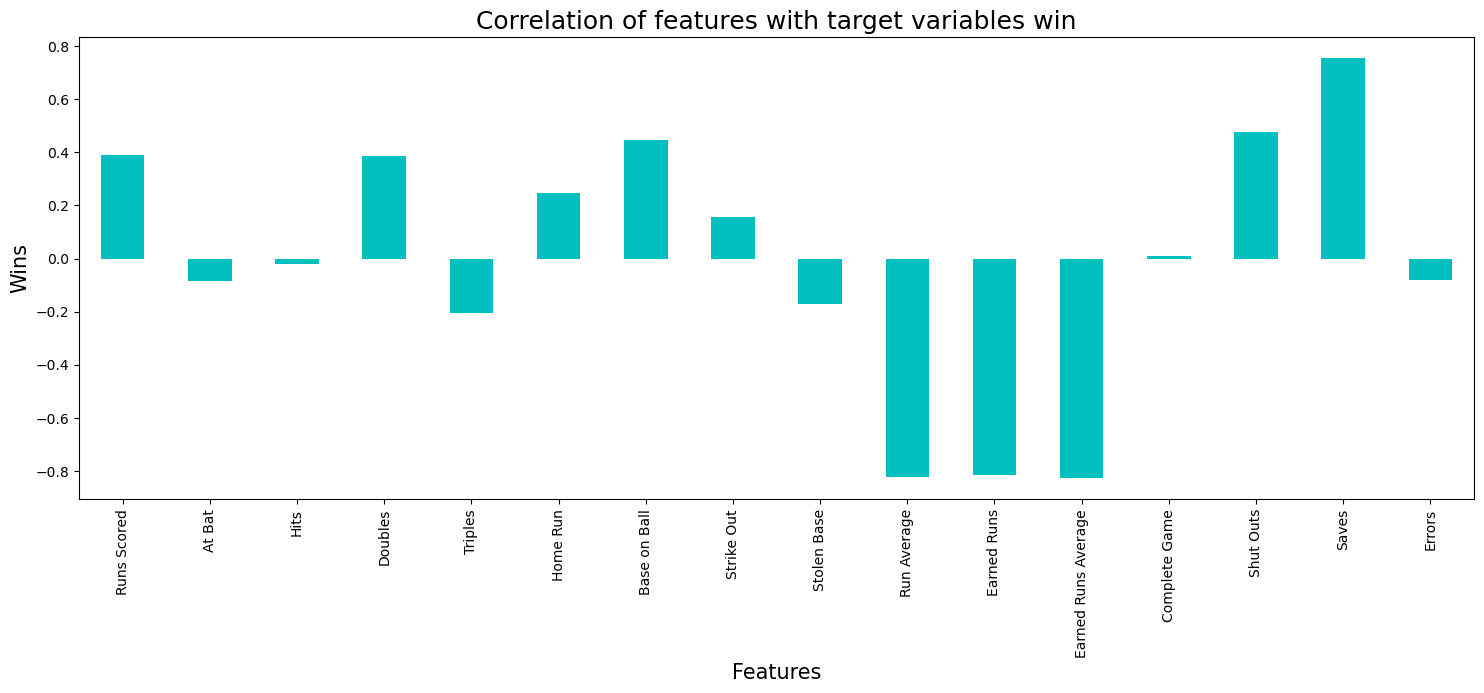

In [48]:
plt.figure(figsize=(18,6))
daa.corr()['Wins'].drop(['Wins']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features',fontsize = 15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with target variables win',fontsize=18)
plt.show()

**Observation-:**

- Hits, At bat, Complete Game and Errors are very poorly correlated with target variables.
- Saves, ERA,RA,EA are highly correlated with target variables.
- Here is visiables multi colinearity between the features column "Earned Average","Earned Run Avergae","Run Average".This need to check

# Checking Multicollinearity between features using variance_inflation_factor

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(daa.values,i) for i in range(daa.shape[1])]
vif['Features']=daa.columns
vif

VIF             Features
0    1123.845609                 Wins
1    2716.749558          Runs Scored
2   18897.920126               At Bat
3   22108.074226                 Hits
4    1031.779375              Doubles
5      34.369567              Triples
6     275.496932             Home Run
7     278.590240         Base on Ball
8     407.664046           Strike Out
9      28.060585          Stolen Base
10  18693.476453          Run Average
11  43006.426757          Earned Runs
12  22289.632769  Earned Runs Average
13      3.567585        Complete Game
14     49.647535            Shut Outs
15    798.607922                Saves
16      2.340538               Errors

**Observation-:**

- EA,ERA,RA are highly correlated with each other
- At bat and hits are 0.0771 correlated with each other. But at same time very poor correlated with target variables

# Standard Scaling

In [50]:
x = daa.drop(columns =['Wins'])
y = daa['Wins']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# PCA

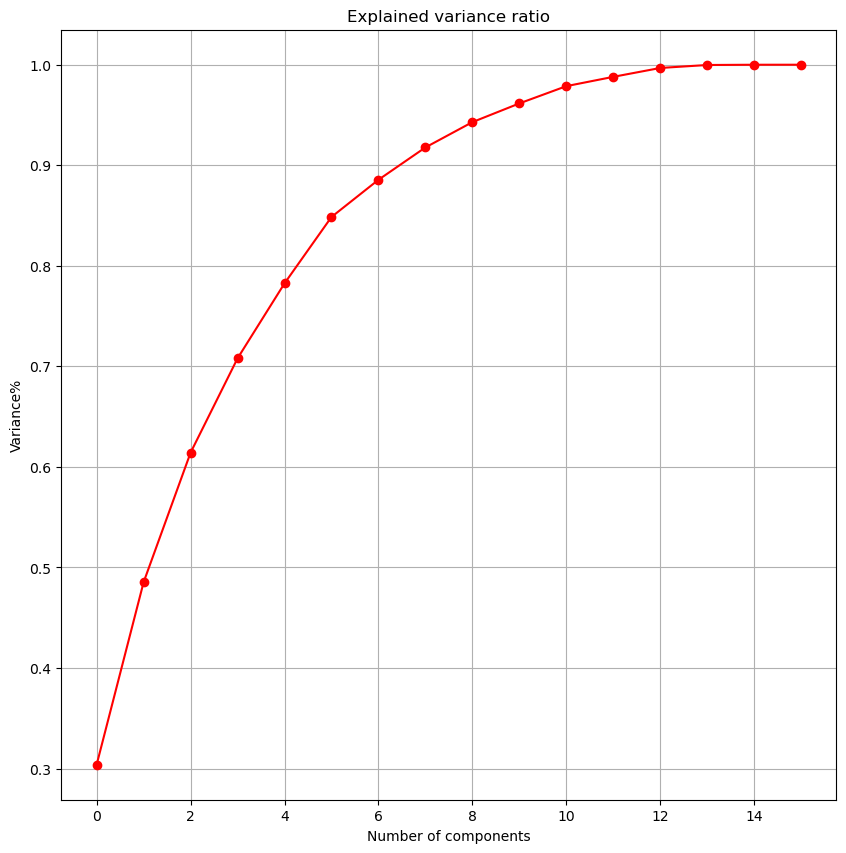

In [52]:
from sklearn.decomposition import PCA
pca = PCA()
# plot the graph to find the principal components
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of components')
plt.ylabel('Variance%')
plt.title("Explained variance ratio")
plt.grid()

**Observation-:**

- As per the graph, we can see that 7 principal components attributes for 95% of variance in the data. We shall pick the first 7 components for our prediction.

In [53]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(x_scale)

In [54]:
pri_x = pd.DataFrame(x_new, columns=np.arange(7))

# Checking multicollinearity after applying pca

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(pri_x.values,i) for i in range(pri_x.shape[1])]
vif['Features']=pri_x.columns
vif

VIF  Features
0  1.0         0
1  1.0         1
2  1.0         2
3  1.0         3
4  1.0         4
5  1.0         5
6  1.0         6

**we can see that multicollinearity issue is clear now.**

# Machine Learning Model Building

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [57]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.3, random_state=42)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (20, 7)
Training target vector : (20,)
Test feature matrix size : (9, 7)
Test target vector size : (9,)


# Finding Best Random Rate

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRs=0
for i in range (1,200):
    x_train,x_test,y_train,y_test= train_test_split(pri_x,y,test_size = .25, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    R2 = r2_score(y_test, y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score, 'on Random_state',maxRS)

Best accuracy is 0.9156396665455285 on Random_state 195


# Linear Regression

In [59]:
x_train,x_test,y_train,y_test = train_test_split(pri_x,y,test_size=.25,random_state=217)
lrr = LinearRegression()
lrr.fit(x_train,y_train)
lrr.score(x_train,y_train)
y_pred = lrr.predict(x_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n', y_test)

Predicted result price:
 [84.74913405 96.23800935 82.55517843 63.71643582 88.07429067 70.55958384
 82.23428514 72.92316412]


actual price
 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


# Linear Regression Evaluation Matrix

In [60]:
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')

print('R2_Score',r2_score(y_test,y_pred))

Mean absolute error : 2.556861881016677
Mean Squared error : 8.633094963474818
Root Mean Squared error 2.938212886003126


R2_Score 0.9172753289920066


# Cross Validation Score

In [61]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, pri_x,y,cv=3)
print("Cross Validation Score",lr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LinearRegression()
CVS Score :  [-0.68537967  0.78807248  0.88638157]
Mean CVS Score :  0.32969146010547395
Std Deviation :  0.7188848850149558


# Logistic Regression

In [62]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
y_pred = lr.predict(x_test)
    
print("Errors of",lr,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of LogisticRegression() :
Mean absolute error : 6.75
Mean Squared error : 71.0
Root Mean Squared error 8.426149773176359


R2_Score 0.3196586315316664


# Random Forest

In [63]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred = rf.predict(x_test)
    
print("Errors of",rf,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of RandomForestRegressor() :
Mean absolute error : 4.899999999999997
Mean Squared error : 35.672849999999976
Root Mean Squared error 5.972675279972951


R2_Score 0.6581730199131609


In [64]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rf, pri_x,y,cv=3)
print("Cross Validation Score",rf)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score RandomForestRegressor()
CVS Score :  [-2.60031184  0.35898664  0.03019014]
Mean CVS Score :  -0.7370450218184628
Std Deviation :  1.324348700411275


# SVR

In [65]:
svr = SVR()

svr.fit(x_train,y_train)
svr.score(x_train,y_train)
y_pred = svr.predict(x_test)
    
print("Errors of",svr,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of SVR() :
Mean absolute error : 7.42531291789715
Mean Squared error : 90.46244485552928
Root Mean Squared error 9.51117473583202


R2_Score 0.13316417566194427


# Decision Tree

In [66]:
dt = DecisionTreeRegressor()

dt.fit(x_train,y_train)
dt.score(x_train,y_train)
y_pred = dt.predict(x_test)
    
print("Errors of",dt,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of DecisionTreeRegressor() :
Mean absolute error : 4.375
Mean Squared error : 23.125
Root Mean Squared error 4.808846015417836


R2_Score 0.7784099416080251


# Ada Boost

In [67]:
ab= AdaBoostRegressor()
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
y_pred = ab.predict(x_test)
    
print("Errors of",ab,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of AdaBoostRegressor() :
Mean absolute error : 4.748076923076923
Mean Squared error : 35.08233727810651
Root Mean Squared error 5.923034465382293


R2_Score 0.6638314739034561


# KNN

In [68]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_pred = ab.predict(x_test)
    
print("Errors of",knn,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of KNeighborsRegressor() :
Mean absolute error : 4.748076923076923
Mean Squared error : 35.08233727810651
Root Mean Squared error 5.923034465382293


R2_Score 0.6638314739034561


# Ridge

In [69]:
r = Ridge()

r.fit(x_train,y_train)
r.score(x_train,y_train)
y_pred = r.predict(x_test)
    
print("Errors of",r,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of Ridge() :
Mean absolute error : 2.53492777914152
Mean Squared error : 8.57057077449601
Root Mean Squared error 2.9275537184646176


R2_Score 0.9178744528271081


In [70]:
cv_score = cross_val_score(r, pri_x,y,cv=3)
print("Cross Validation Score",r)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score Ridge()
CVS Score :  [-0.49734467  0.7799349   0.90119154]
Mean CVS Score :  0.3945939225333725
Std Deviation :  0.6326355594250126


# Lasso

In [71]:
l = Lasso()

l.fit(x_train,y_train)
l.score(x_train,y_train)
y_pred = l.predict(x_test)
    
print("Errors of",l,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of Lasso() :
Mean absolute error : 3.3085450844060773
Mean Squared error : 13.259476997167372
Root Mean Squared error 3.641356477628546


R2_Score 0.8729440742897572


In [72]:
cv_score = cross_val_score(l, pri_x,y,cv=3)
print("Cross Validation Score",l)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score Lasso()
CVS Score :  [-0.18815984  0.71477267  0.91008771]
Mean CVS Score :  0.4789001774197064
Std Deviation :  0.4783748835754164


# Hyper Parameter Tuning: GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
            'fit_intercept':[True,False],
            'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
            'solver':["auto","svd","cholesky","lsqr","sparse_cg","sag","saga"]}

In [75]:
gc = GridSearchCV(Ridge(),parameter,cv=5,n_jobs=-1,verbose=3)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 33600 candidates, totalling 168000 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             verbose=3)

In [76]:
gc.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 250,
 'random_state': 67,
 'solver': 'saga'}

# Final Model

In [77]:
final = Ridge(alpha = 1.0,fit_intercept= True, max_iter = 250,random_state = 67, solver = 'saga')
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score',r2_score(y_test,y_pred))


 Final Random Forest Classifier Evaluation


Mean absolute error : 2.5347147091635183
Mean Squared error : 8.573713745220168
Root Mean Squared error 2.9280904605596065
R2_Score 0.9178443360242415


# Prediction the final model

In [78]:
# Prediction
prediction = final.predict(x_test)

In [79]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

Predicted Values  Actual Values
0         84.716884             81
1         95.992108             98
2         82.541912             79
3         63.982695             63
4         87.711640             87

# Saving Model

In [80]:
import joblib
joblib.dump(final,"Baseball_project")

['Baseball_project']